This dataset is collected from UCI Machine Learning Repository through the following link: https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification#

Data Set Information:

The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine
, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone
is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

Attribute Information:

Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features
have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

Citation Request:

If you use this dataset, please cite: Sakar, C.O., Serbes, G., Gunduz, A., Tunc, H.C., Nizam, H., Sakar, B.E., Tutuncu, M., Aydin, T., Isenkul, M.E. and Apaydin, H., 2018. A comparative analysis of
 speech signal processing algorithms for Parkinsonâ€™s disease classification and the use of the tunable Q-factor wavelet transform. Applied Soft Computing, DOI: [Web Link]
 https://doi.org/10.1016/j.asoc.2018.10.022

### What is Parkison's Disease?

Parkinson's is a neurodegenarative progressive disorder disease. It affects the nervous system and the part of the body controlled by it. It appears in the part of the brain called substantia nigra. Normally these brain cells produce dopamine and these dopamine operates in a delicate balance with other neurotransmitters to help cordinate the millions of nerve and muscle cell involved in the movement. When these nerve cells die or become impaired, they lose the ability to produce the dopamine. When 60-80% of these cells are lost then enough dopamine are not produced and Parkinson's motor symptoms appear. Without enough dopamine, this balance is disrupted resulting tremor, rigidity, slowness of movement and impaired balance. So Parkinson's disease is caused by the disruption of the brain cells that produce the dopamine which allows the brain to communicate each other and control the fluency of the movement. It is thought that the disease begins many years before the motor symptoms appears and therefore, researchers are looking for ways to recognize the non-motor symptoms that appear early in the disease as early as possible, thereby halting the progression of the disease. A person suffering from the Parkinson's can have following symptoms:

*Tremor*

*Slowed movement*

*Rigid muscle*

*Impaired posture*

*Loss of automatic movement*

*Speech change*

*Writing change*

*Impaired posture*
Also, Parkinson's disease can have other symptoms that include:

*Depression*

*Anxiety*

*Sleeping and memory-related issues*

*Loss of sense of smell along with balance problems*

The symptoms of Parkinson's disease can be different from patient to pateint. Early sign of the disease can be mild and can go unnoticed. Symptoms often begin on one side of your body and usually remain worse on that side. Sometimes it is difficult to detect whether there is Parkinson's disease present in the patient's body. Parkinson's disease if detected in the early stage will be curable, and will be time and cost effective, but there is no effective treatment in the advanced stage.


##Attribute Information :

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA - Several measures of variation in amplitude

NHR , HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE , D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1 , spread2 , PPE - Three nonlinear measures of fundamental frequency variation

##Understanding the dataset

###Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

###'0' refers to (B)enign
###'1' refers to (M)alignant

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape



(195, 24)

In [5]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Checking missing values in dataset

In [6]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### There are no NANs in the dataset

In [7]:
# getting some statistical measures about the data
parkinsons_data.describe()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [8]:

# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

### The Dataset is biased towards the (M)alignant category

In [9]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

<ipython-input-9-fe279e55666c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR        HNR  \
status                    ...                                               
0               0.162958  ...  0.013305     0.028511  0.011483  24.678750   
1               0.321204  ...  0.027600     0.053027  0.029211  20.974048   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                              
0       0.442552  0.695716 -6.759264  0.160292  2.154491  0.123017  
1       0.516816  0.725408 -5.333420  0.248133  2.456058  0.233828  

[2 rows x 22 columns]

In [10]:
df=parkinsons_data.copy()

In [11]:
df=df. loc[:, df. columns !="name"]
df = df. loc[:, df. columns !="status"]
df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031   
1   0.04368      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192   
2   0.03590      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179   
3   0.03772      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501   
4   0.04465      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 22 columns]

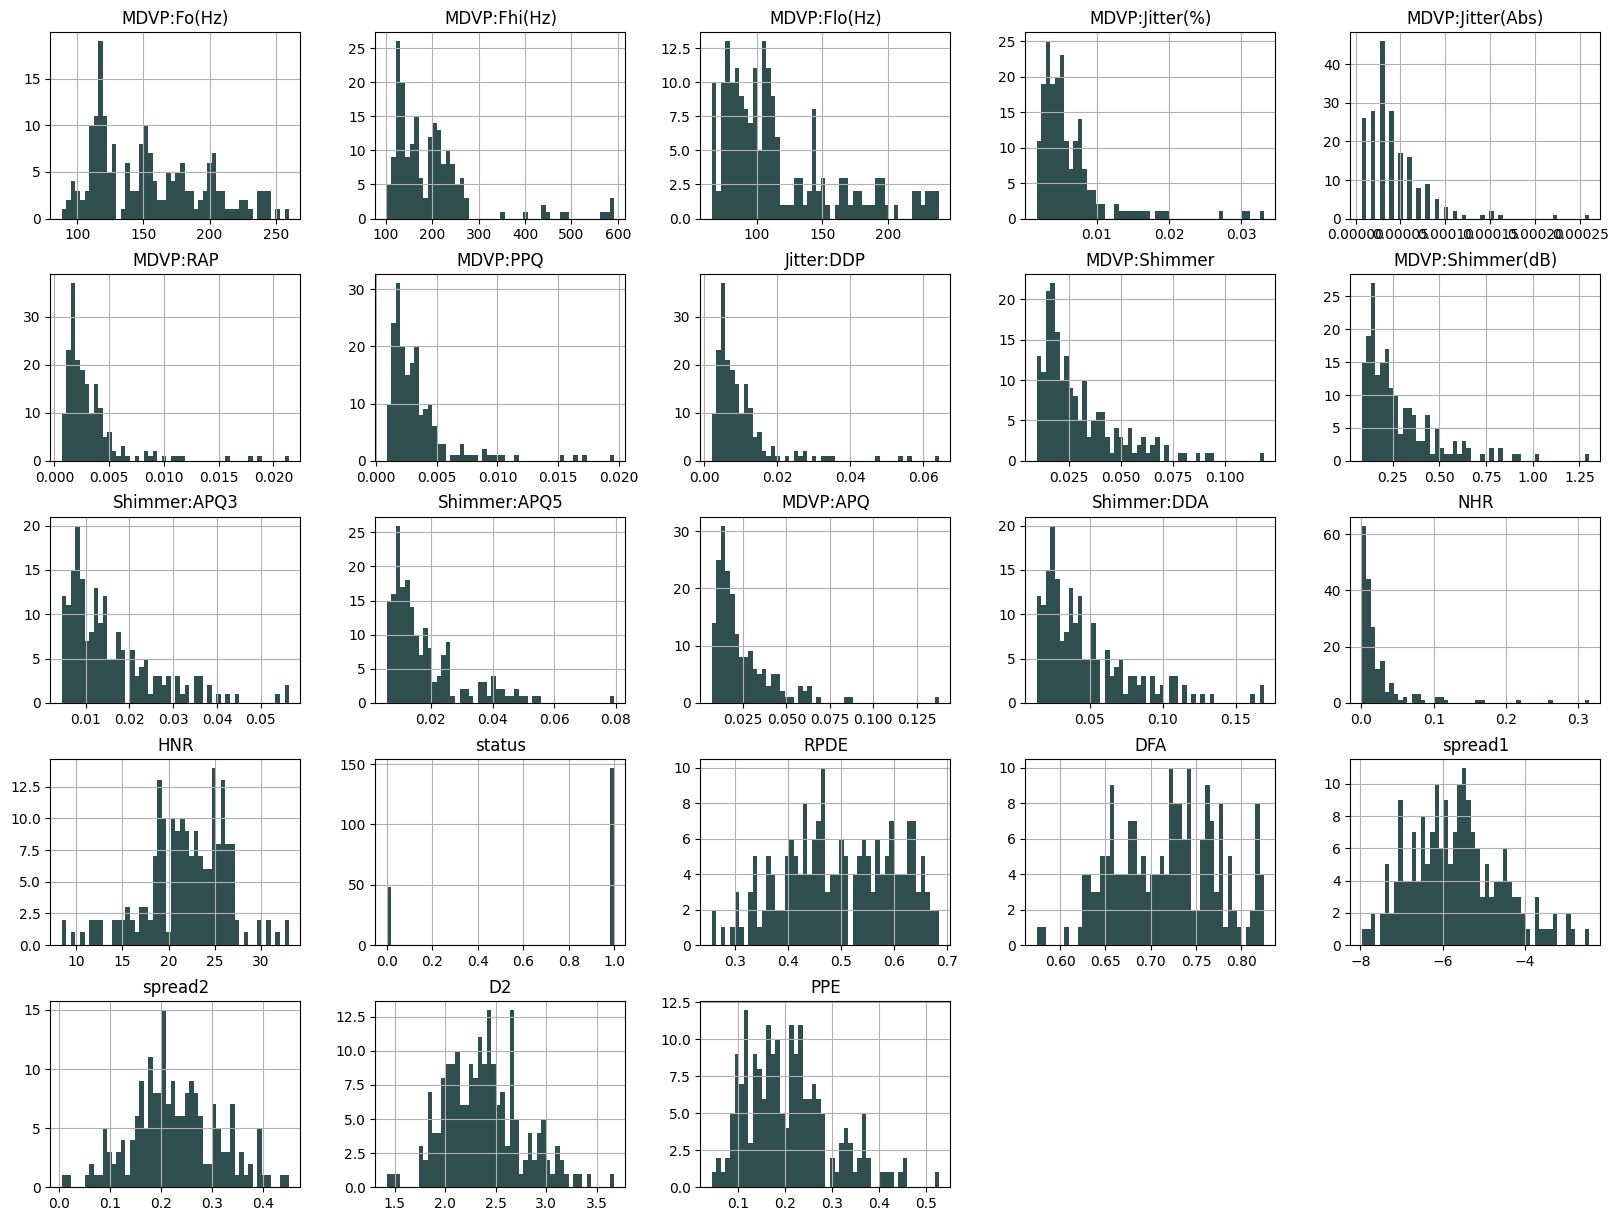

In [12]:
parkinsons_data.hist(bins=50, figsize =(20,15), color = 'darkslategrey')
plt.show(block=False)

#### The input features are scaled before showing their boxplots.

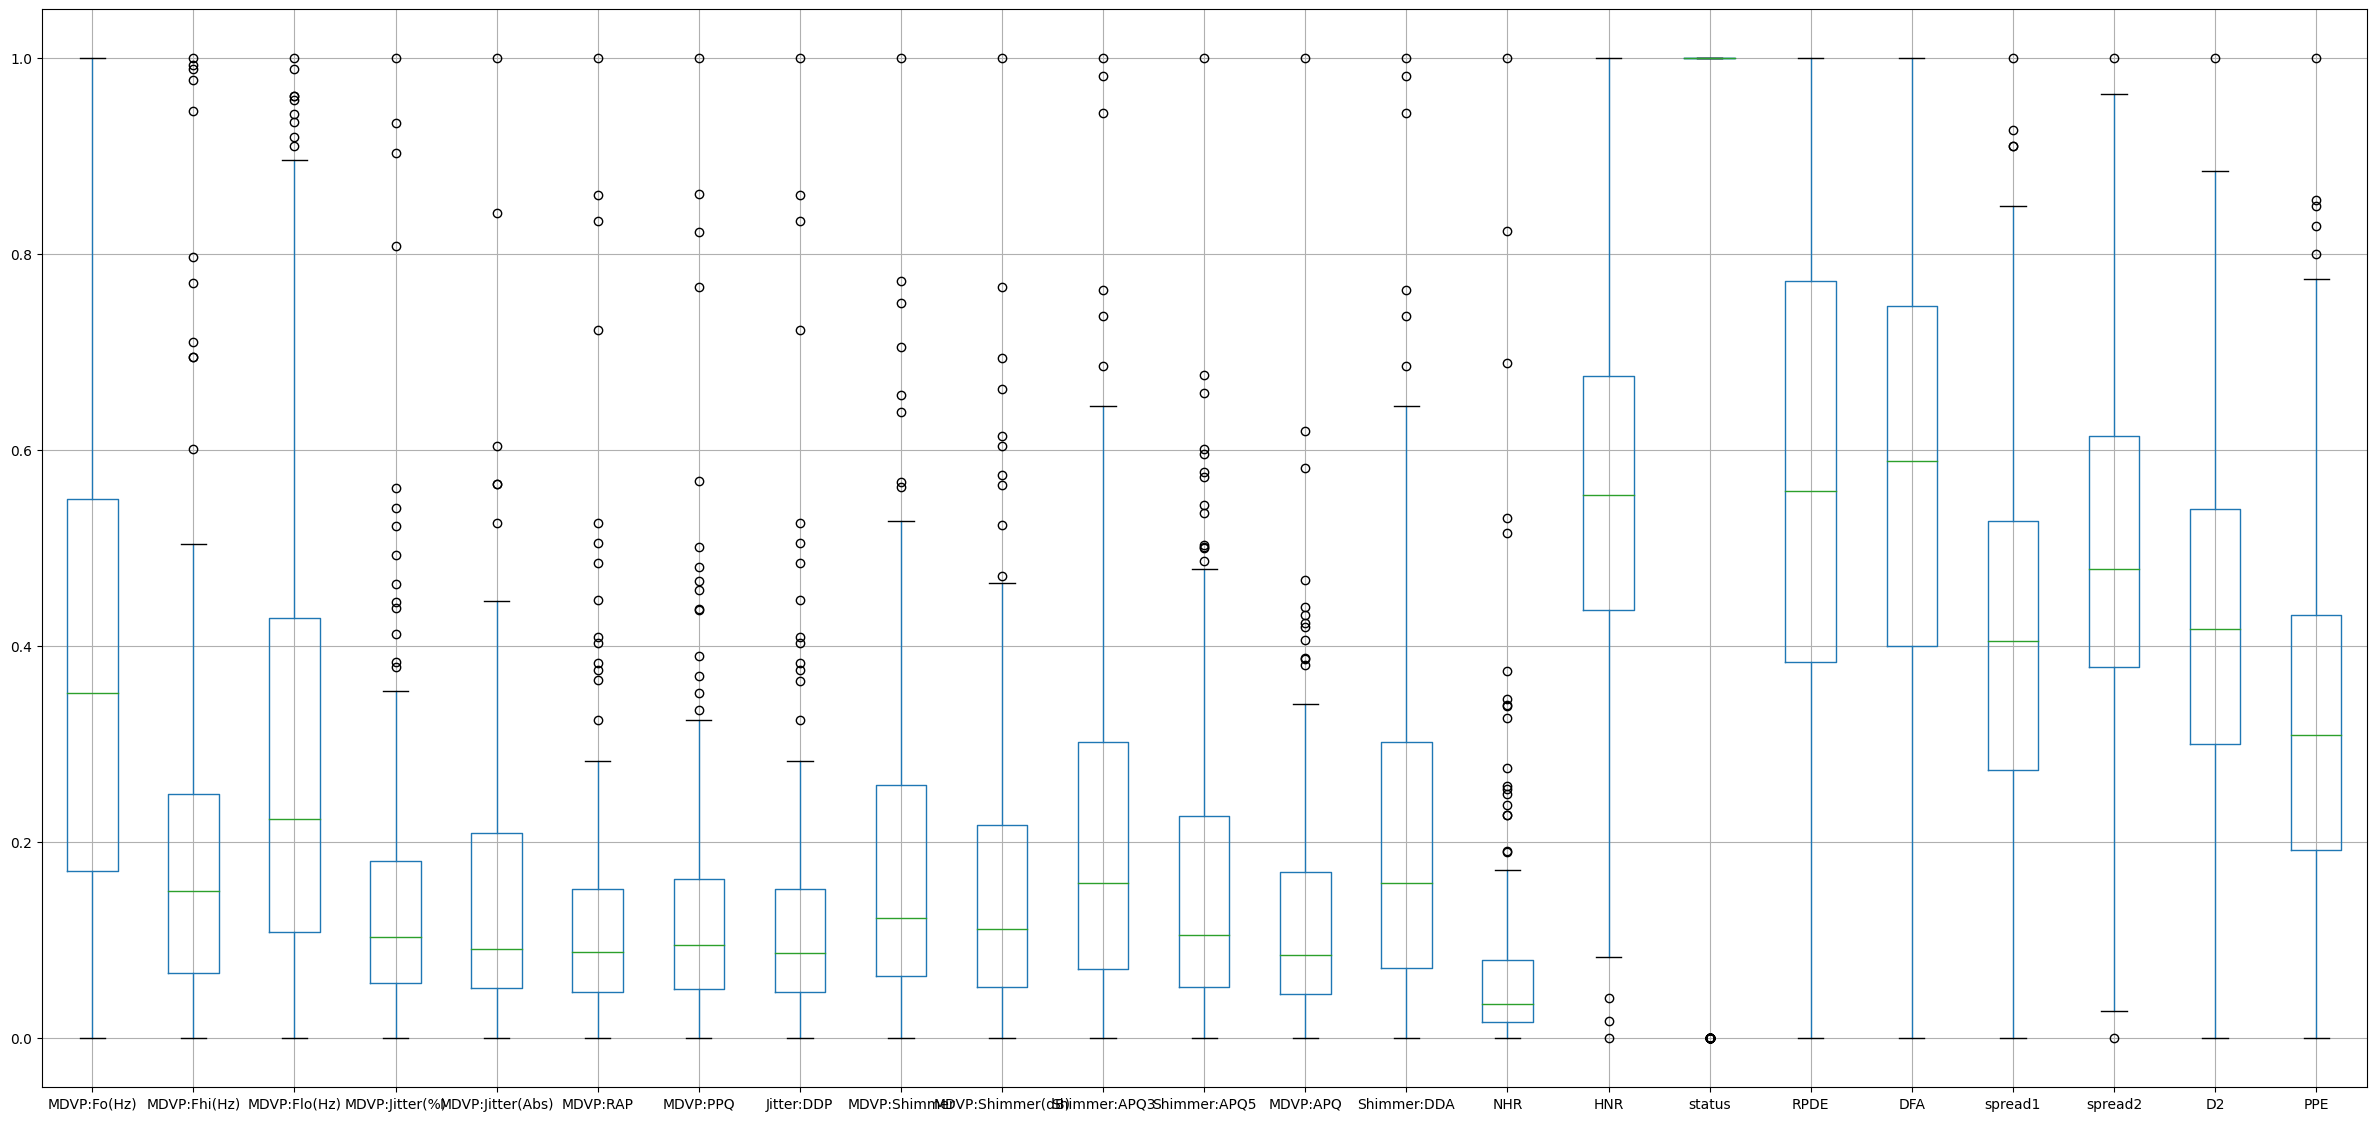

In [13]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_boxplot = parkinsons_data.drop(['name'],axis=1)
data_boxplot = minmax.fit_transform(data_boxplot)
boxplot = pd.DataFrame(data_boxplot, columns = parkinsons_data.drop(['name'],axis=1).columns)
boxplot.boxplot(figsize=(30,14))
plt.show(block=False)


- These points outside the whiskers are identified as outliers.

- Outliers are data points that fall outside the interquartile range (IQR) of the data and are often considered as extreme values. While outliers are commonly viewed as anomalies or errors, they can also represent real-world variability and provide valuable insights into the data.

- According to our case and dataset distribution, outliers represent rare events or extreme cases that are important to include in the analysis In finance, outliers provide important insights into the data and the underlying distribution.

In [14]:
sns.pairplot(parkinsons_data.loc[:, parkinsons_data.columns !="name"],hue="status")

<ipython-input-15-e5fee26cee01>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(parkinsons_data.corr(), annot = True,annot_kws={'size':19})


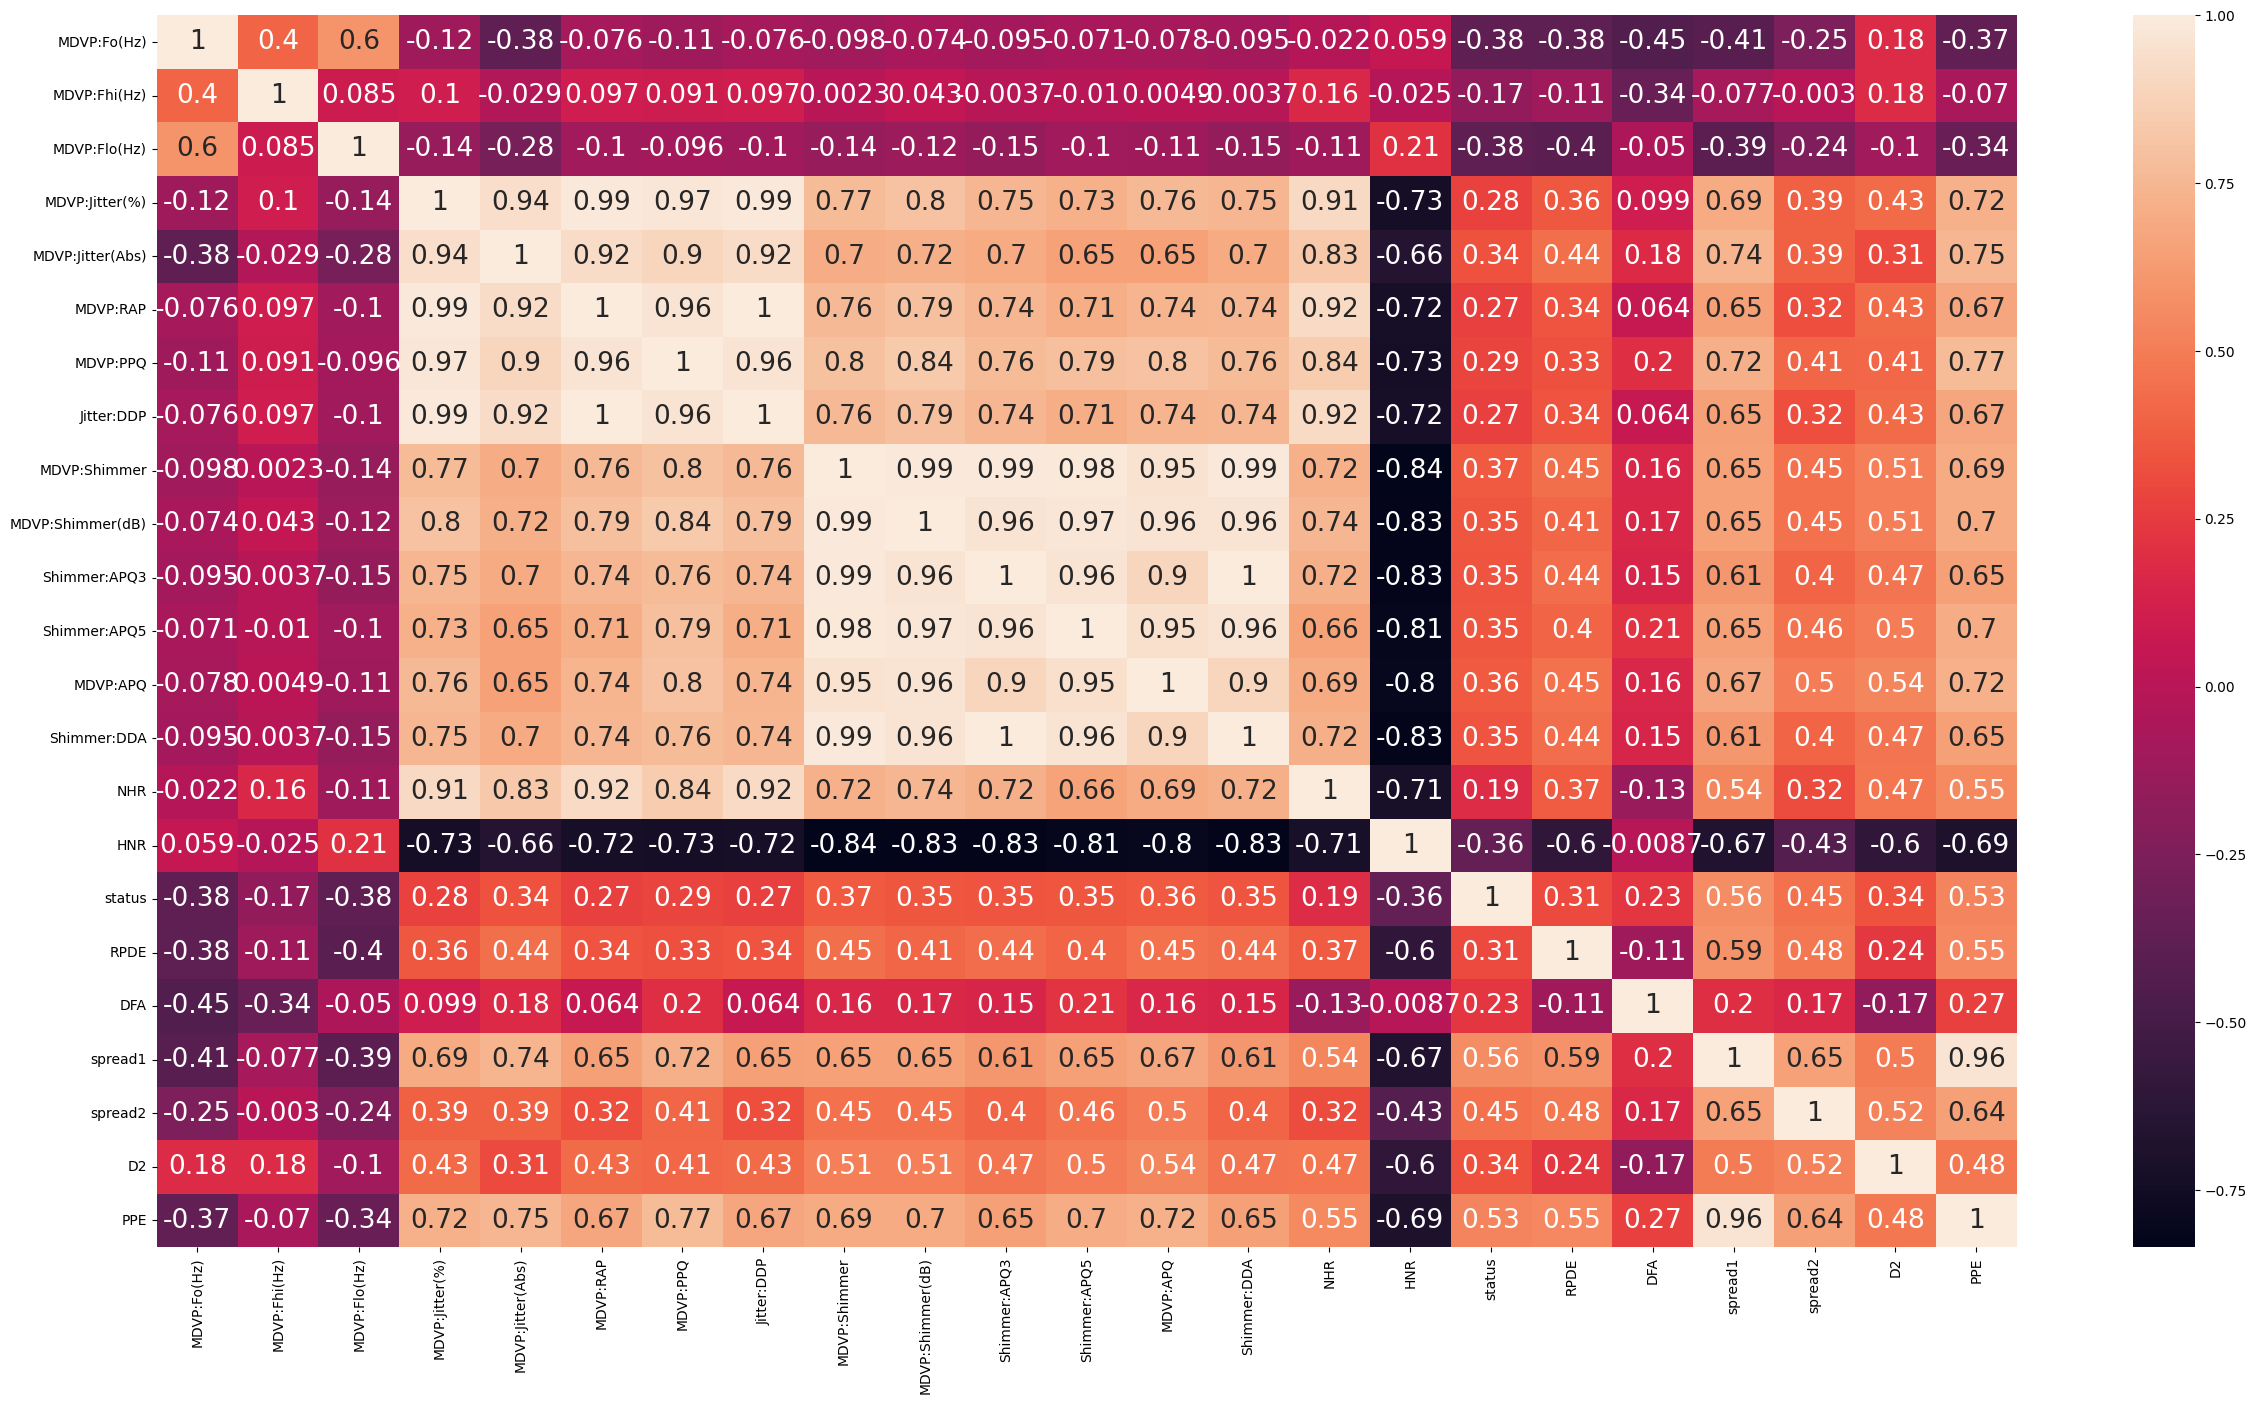

In [15]:
plt.figure(figsize=(30,16))
sns.heatmap(parkinsons_data.corr(), annot = True,annot_kws={'size':19})
plt.show()

<ipython-input-16-c4dfbafe4f03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(parkinsons_data.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True)


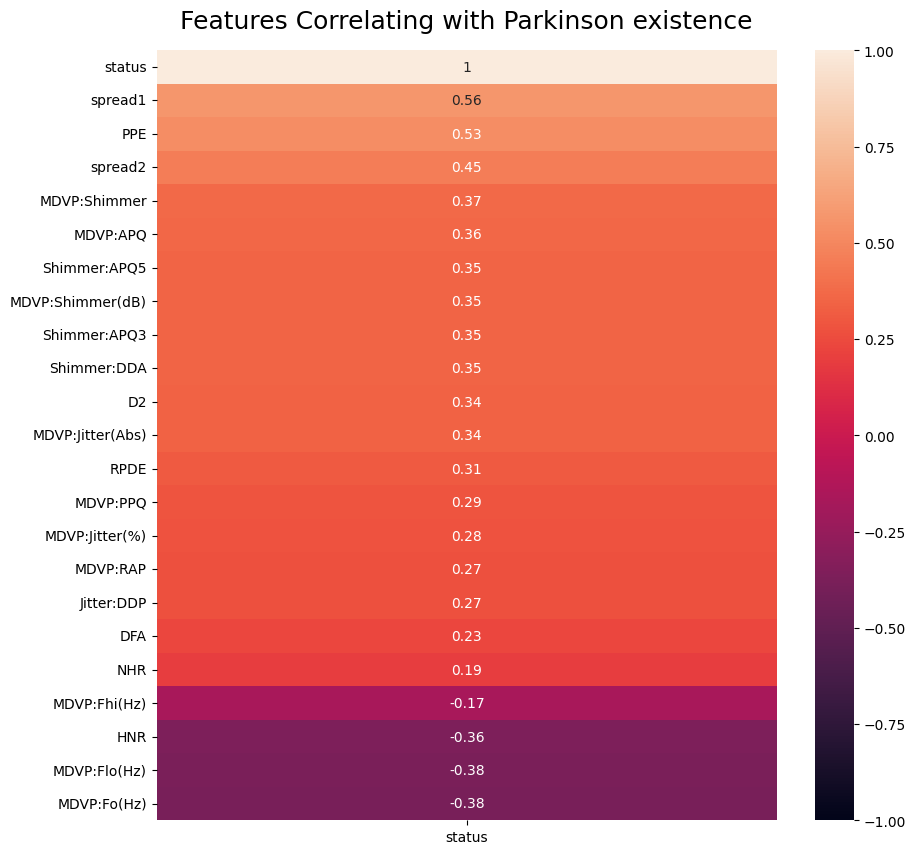

In [16]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(parkinsons_data.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Parkinson existence', fontdict={'fontsize':18}, pad=16);

### Uncovering and Mitigating Bias in PD Class-Imbalanced Dataset

### 3/4 of the instances given are parkinson's patients and the other 1/4 are benign

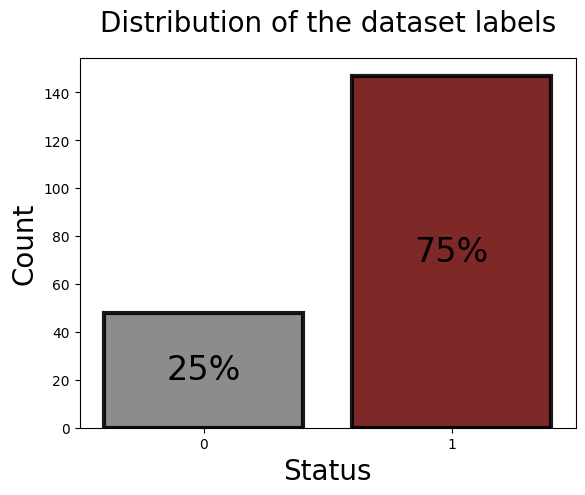

In [17]:
fig = sns.countplot(parkinsons_data, x='status', palette=['grey', 'maroon'], edgecolor='black', linewidth=3, alpha=0.9)

total = len(parkinsons_data['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)

fig.set_xlabel('Status', fontsize=20)
fig.set_ylabel('Count', fontsize=20)

plt.title('Distribution of the dataset labels',y = 1.05, fontsize=20)
plt.show()


* As shown in the above figure, The dataset appears to be unbalanced, with a significantly higher number of samples in Malignant category compared to the other.

To address the issue of class imbalance, a over-sampling data balancing technique will be used

- SMOTE oversampling technique

The SMOTE Over Sampler technique is a oversampling used to address class imbalance, Oversampling involves increasing the number of samples in the minority class to match the number of samples in the majority class.

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from termcolor import colored

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from termcolor import colored
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc

In [19]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20)
    plt.ylabel('True Labels', labelpad=25, fontsize=20)
    plt.show()
    print('-'*80)

###Data Preprocessing

### Feature Engineering

- X will refer to our input features.
- y will refer to the target feature[status].

- Without balancing the dataset



In [20]:
X=parkinsons_data.drop(['name','status'],axis=1)
y=parkinsons_data["status"]


### Balancing the dataset


## Splitting the data into Training and Testing samples

-- Without balancing the data :

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




-- Applying SMOTE Oversampling Technique :


In [22]:
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE(random_state=42)
X_smote_train, y_smote_train = smote_sampler.fit_resample(X_train, y_train)
smote_data = pd.concat([X_smote_train, y_smote_train], axis=1)


#X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, train_size=0.8, random_state=42)

In [23]:
smote_data.shape

(206, 23)

In [24]:
len(smote_data[smote_data.status==1].value_counts())

103

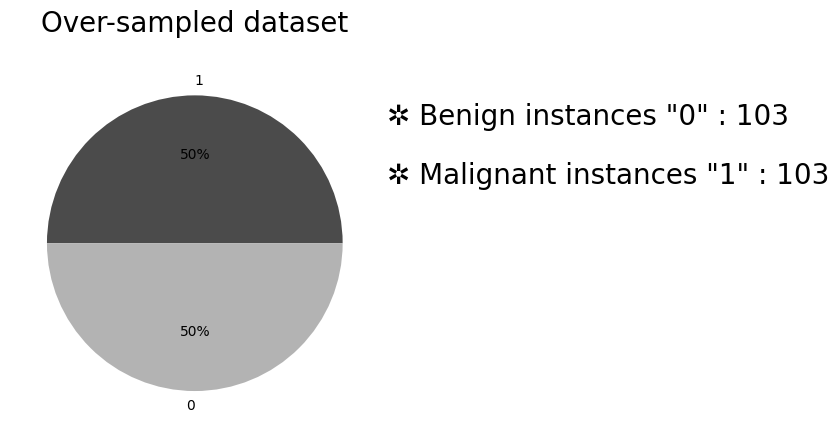

In [25]:
num_status=smote_data['status'].value_counts()
over_counts = num_status.values
plt.pie(num_status, labels=num_status.index.values, colors=[(0.29296875,0.29296875,0.29296875), (0.703125,0.703125,0.703125)]
        , autopct='%d%%')
plt.title('Over-sampled dataset', y=1.05, fontsize=20)
plt.text(x=1.3, y=0.8, s=f'✲ Benign instances "0" : {len(smote_data[smote_data.status==0].value_counts())}', fontsize=20)
plt.text(x=1.3, y=0.4, s=f'✲ Malignant instances "1" : {len(smote_data[smote_data.status==1].value_counts())}', fontsize=20)
plt.show(block=False)

Normalization

Minmax_scalar= xi−xmin/xmax−xmin
where X is a particular feature represented by a column in the dataset, xi is a value of this column where i is the number of elements in the column. The minimum value of the column is represented as Xmin and the maximum value of the column is  Xmax.

-- Normalizing the unbalanced data



In [26]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


-- Normalizing the oversampled data

In [27]:
X_smote_train_scaled = scaler.fit_transform(X_smote_train)
y_smote_train_scaled= y_smote_train


X_smote_test=X_test
X_smote_test_scaled = scaler.transform(X_smote_test)
y_smote_test=y_test

## Fitting on Unbalanced Data

## K-Nearest Neighbour

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

We can get a probability of belonging to a each class for each sample, here are the first ten

In [30]:
knn.predict_proba(X_test_scaled)[0:10]

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.33333333, 0.66666667]])

The confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions. The classification report provides the precision, recall, F1-score, and support for each class, which are important metrics for evaluating the performance of a classifier. The accuracy score is a simple metric that calculates the proportion of correct predictions out of the total predictions made by the model. These three elements together provide a comprehensive evaluation of the classifier's performance on the test dataset. Let's prints the confusion matrix, classification report, and accuracy score for a given classification model.

In [31]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming Evaluate_Performance function calculates the AUC-ROC score
def Evaluate_Performance_AUC(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


Confusion matrix, without normalization
[[12  3]
 [ 2 42]]


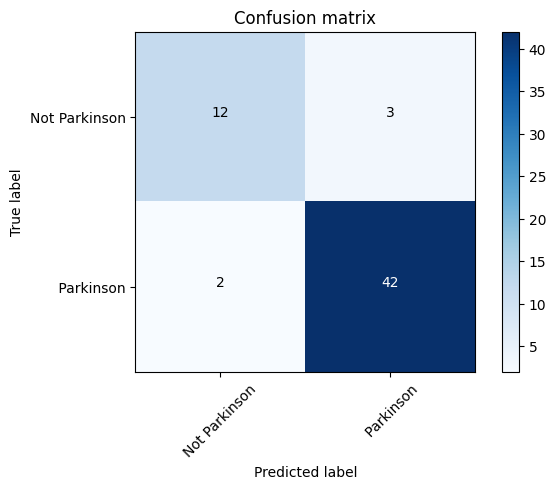

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [34]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.93      0.95      0.94        44

    accuracy                           0.92        59
   macro avg       0.90      0.88      0.89        59
weighted avg       0.91      0.92      0.91        59


Accuracy Score: 0.9152542372881356



 • Training Accuracy Score :  97.79
 • Cross Validation Score : 91.98
 ❖ Testing Accuracy Score :  91.53
 • Precision Score is : 93.33
 • Recall Score is : 95.45
 • F1-Score Score is : 94.38
--------------------------------------------------------------------------------


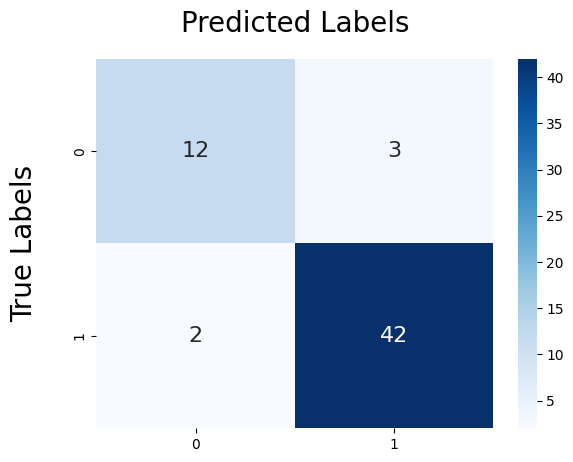

--------------------------------------------------------------------------------


In [35]:
Evaluate_Performance(KNeighborsClassifier(n_neighbors=3), X_train_scaled, X_test_scaled, y_train, y_test)

### GridSearchCV
In the code above, we randomly selected the hyperparameter K for our KNN classifier. However, in order to find the optimal hyperparameters that maximize the performance metric, we will perform a grid search. To do this, we define a parameter grid that we will search over for K.

In [36]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],

}

# Define the KNN classifier object
knn = KNeighborsClassifier()

In medical testing, recall is a measure of the ability of a test to correctly identify true positive cases, or the proportion of actual positive cases that are correctly identified by the test. A high recall means that the test is able to correctly identify a large proportion of true positive cases, even if it may also produce some false positive results, therefore for scoring we select recall . The choice of performance metric for a machine learning model may depend on several factors.
The next cell performs a grid search over the hyperparameters of a KNN classifier using GridSearchCV() function from scikit-learn library. The param_grid parameter specifies a dictionary of hyperparameters to search over, while the scoring parameter specifies the performance metric to optimize for, which in this case is the recall. The cv parameter specifies the number of folds for cross-validationv cv . The resulting grid_search object can be used to fit the data and obtain the best hyperparameters that maximize the performance metric.

In [37]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=5)

grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

In [38]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

## Print the best parameters and score on validation data

In [39]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'n_neighbors': 7}
Best Score:  0.9609523809523809


In [40]:
#Get the predicted labels on the test data using the best estimator:
y_pred = grid_search.best_estimator_.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### Calculate the recall score on the test data using the predicted labels:

In [41]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)


In [42]:
X_scaled=scaler.fit_transform(X)

In [43]:
#Now we use all our data to train the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=7)

In [44]:
y_hat =knn.predict(X_scaled)

Confusion matrix, without normalization
[[ 41   7]
 [  5 142]]


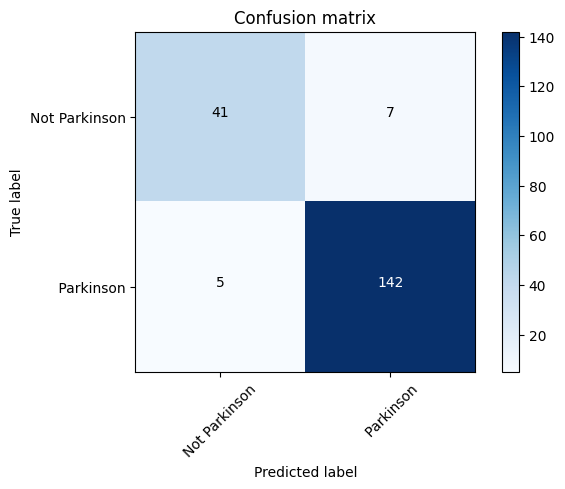

In [45]:
plot_confusion_matrix(confusion_matrix(y, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [46]:
print("\nClassification Report:\n", classification_report(y, y_hat))
print("\nAccuracy Score:", accuracy_score(y, y_hat))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.95      0.97      0.96       147

    accuracy                           0.94       195
   macro avg       0.92      0.91      0.92       195
weighted avg       0.94      0.94      0.94       195


Accuracy Score: 0.9384615384615385


## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [48]:
lr.coef_

array([[-0.35521344, -0.40421763, -0.19474697, -0.41106206, -0.31961617,
         0.32719564,  0.02372566,  0.32657971,  0.16558834,  0.19938191,
        -0.10934693,  0.37628428,  0.39667184, -0.1101514 , -0.24814876,
         0.10391702, -0.27161663,  0.14671224,  0.68423311,  0.2708601 ,
         1.25448907,  0.9153036 ]])

In [49]:
lr.intercept_

array([2.54704671])

In [50]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

We can get a probability of belonging to a each class for each sample, here are the first ten

In [51]:
lr.predict_proba(X_test_scaled)[0:10]

array([[0.01598406, 0.98401594],
       [0.23210045, 0.76789955],
       [0.01732405, 0.98267595],
       [0.09574941, 0.90425059],
       [0.1435313 , 0.8564687 ],
       [0.19112345, 0.80887655],
       [0.01646468, 0.98353532],
       [0.15484387, 0.84515613],
       [0.06992531, 0.93007469],
       [0.32434505, 0.67565495]])

We can display the confusion matrix as well as a classification report

Confusion matrix, without normalization
[[ 9  6]
 [ 2 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59


Accuracy Score: 0.864406779661017


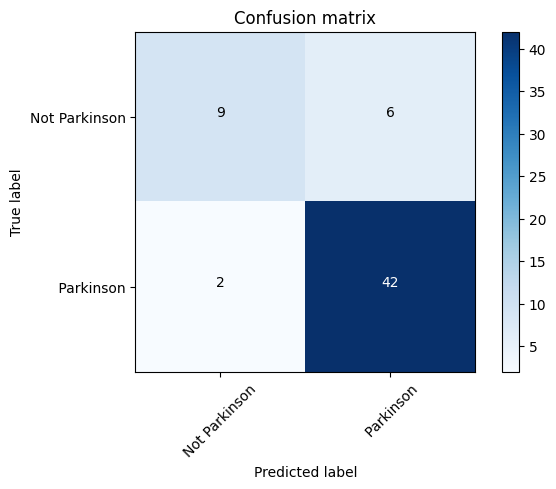

In [52]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

While grid search can be used to optimize hyperparameters for many machine learning algorithms, the hyperparameters in logistic regression may not be particularly insightful. Instead, we can use logistic regression to identify feature importance, as the coefficients learned during training can reveal which features are most strongly associated with the target variable. We can obtain the coefficients.

In [53]:
coef=abs(lr.coef_[0])

The coefficients represent the impact of each feature on the probability of the positive class, So larger the magnitude of the coefficients are more important the feature


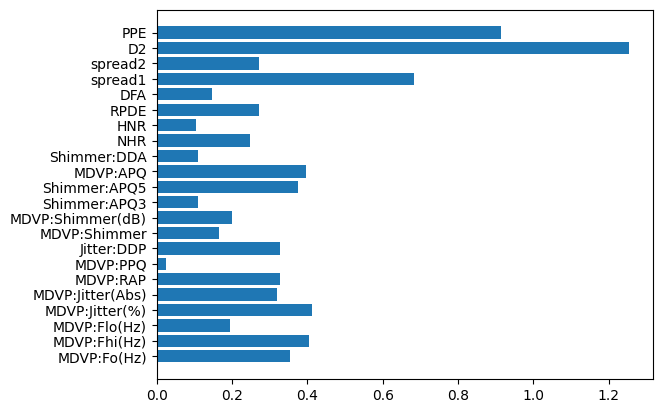

In [54]:
plt.barh(X.columns, coef)
plt.show()

We can select the features with the highest magnitude coefficients

In [55]:
best_columns=X.columns[np.argsort(-1*coef)[0:5]]
best_columns

Index(['D2', 'PPE', 'spread1', 'MDVP:Jitter(%)', 'MDVP:Fhi(Hz)'], dtype='object')

Confusion matrix, without normalization
[[ 9  6]
 [ 2 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59


Accuracy Score: 0.864406779661017


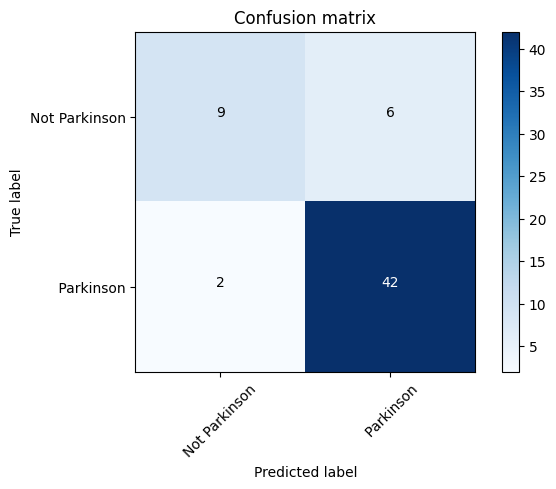

In [56]:
X_train_1= X_train[best_columns]
X_test_1 = X_test[best_columns]

X_train_scaled_1 = minmax.fit_transform(X_train_1)
X_test_scaled_1 = minmax.transform(X_test_1)



log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled_1, y_train)

# Get the predicted probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test_scaled_1)

plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

We see many of the features are redundant, identifying and removing redundant features can potentially help in a few ways.
First, it can reduce the amount of data required for the model, which can reduce the cost of storing and processing data.
Second, it can improve the performance of the model, allowing it to make more accurate predictions with fewer resources. This can help reduce the cost of misclassifications or errors in the predictions.
Finally, it can also reduce the cost of model development and maintenance. Removing redundant features can simplify the model, making it easier to develop and maintain over time. It can also reduce the need for frequent updates and retraining, which can be costly in terms of time and resources¶


 • Training Accuracy Score :  88.24
 • Cross Validation Score : 83.9
 ❖ Testing Accuracy Score :  86.44
 • Precision Score is : 87.5
 • Recall Score is : 95.45
 • F1-Score Score is : 91.3
--------------------------------------------------------------------------------


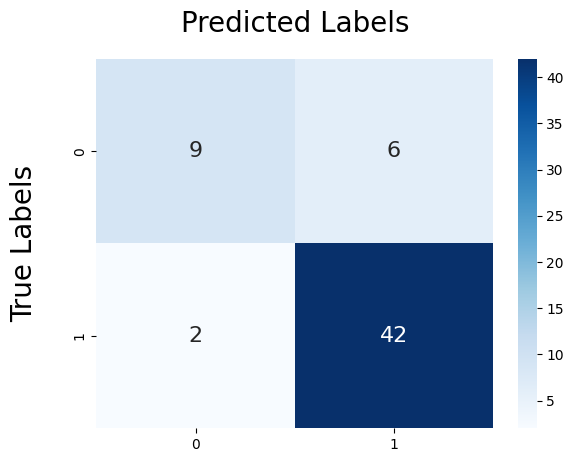

--------------------------------------------------------------------------------


In [57]:
Evaluate_Performance(LogisticRegression(max_iter=10000), X_train_scaled, X_test_scaled, y_train, y_test)

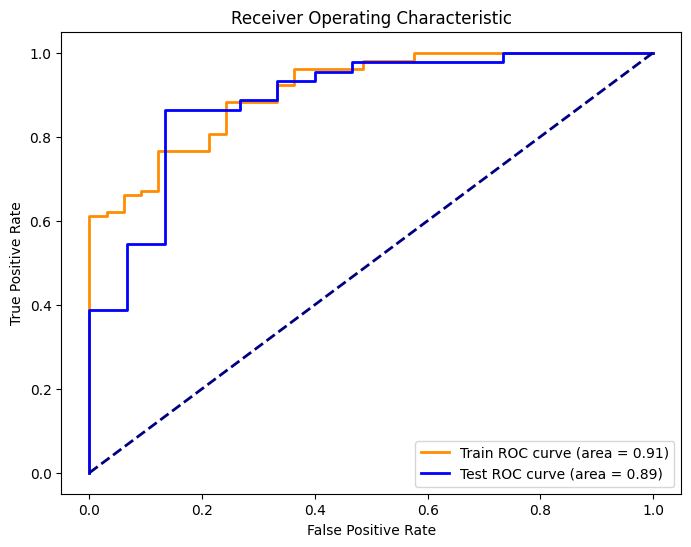

In [58]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled_1, y_train)
Evaluate_Performance_AUC(log_reg,X_train_scaled_1,X_test_scaled_1,y_train,y_test)

### Now fitting over all data

Confusion matrix, without normalization
[[ 32  16]
 [  8 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        48
           1       0.90      0.95      0.92       147

    accuracy                           0.88       195
   macro avg       0.85      0.81      0.82       195
weighted avg       0.87      0.88      0.87       195


Accuracy Score: 0.8769230769230769


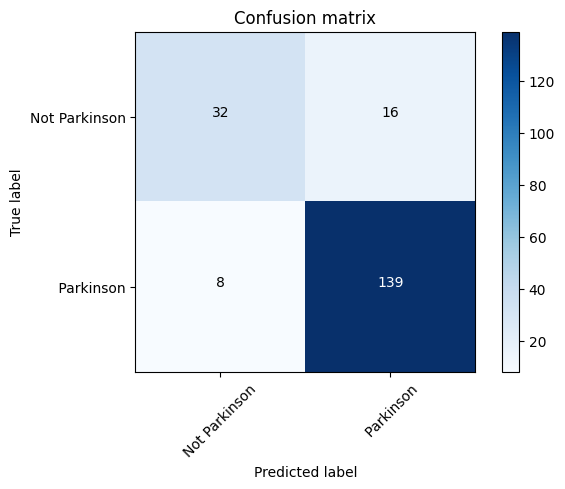

In [59]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_scaled, y)

# Get the predicted probabilities for each class
y_pred_proba = log_reg.predict_proba(X_scaled)
y_pred = log_reg.predict(X_scaled)

plot_confusion_matrix(confusion_matrix(y, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nAccuracy Score:", accuracy_score(y, y_pred))

## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from termcolor import colored

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from termcolor import colored
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc

In [61]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20)
    plt.ylabel('True Labels', labelpad=25, fontsize=20)
    plt.show()
    print('-'*80)

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 81.59
 ❖ Testing Accuracy Score :  86.44
 • Precision Score is : 90.91
 • Recall Score is : 90.91
 • F1-Score Score is : 90.91
--------------------------------------------------------------------------------


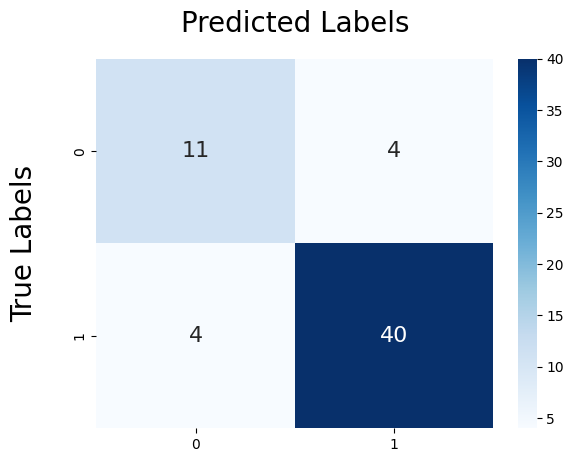

--------------------------------------------------------------------------------


DECISION TREE :


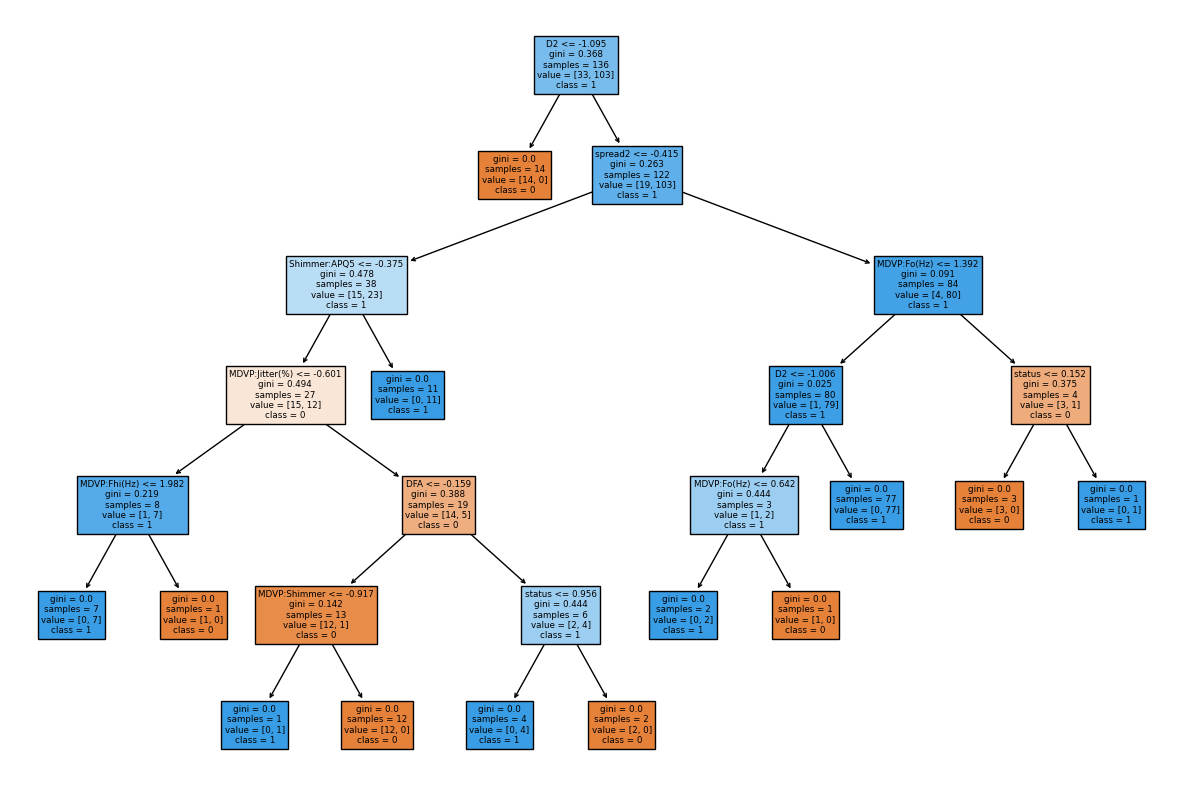

In [62]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(15,10))
tree = plot_tree(DTC, feature_names = [ c for c in parkinsons_data.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,10)),
    'min_samples_split':list(range(1,20)),
    'min_samples_leaf': list(range(1,5)),
    "ccp_alpha": list(range(0,1))
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 6}
Best recall score: 0.8968253968253969


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 6840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  96.32
 • Cross Validation Score : 83.79
 ❖ Testing Accuracy Score :  83.05
 • Precision Score is : 90.48
 • Recall Score is : 86.36
 • F1-Score Score is : 88.37
--------------------------------------------------------------------------------


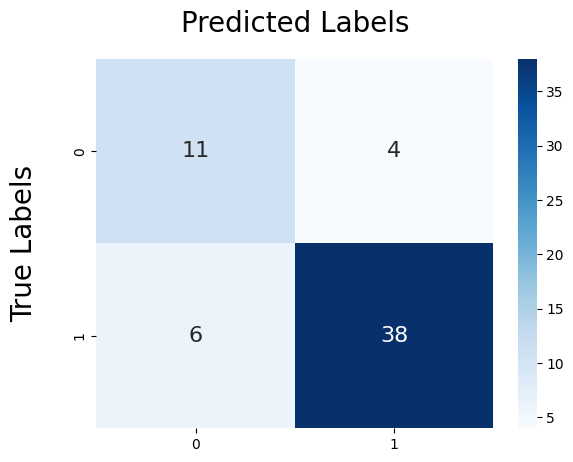

--------------------------------------------------------------------------------


DECISION TREE :


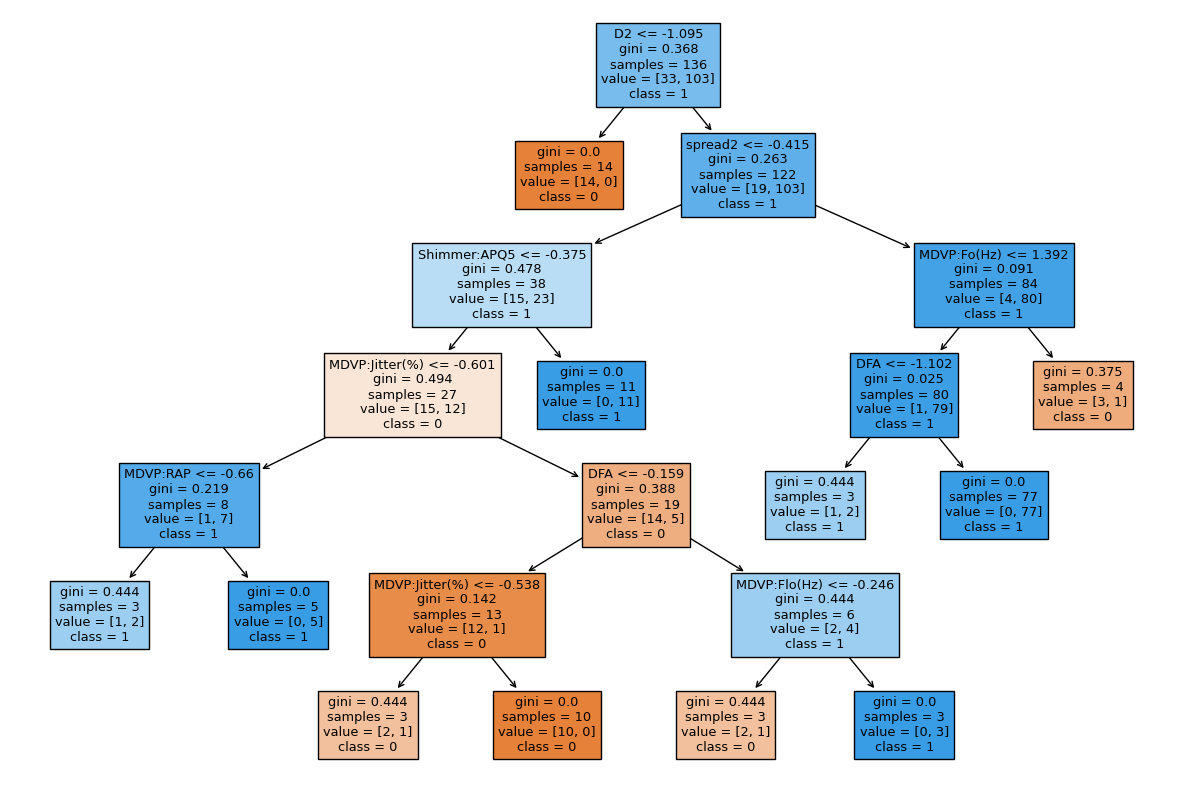

In [64]:
DTC=DecisionTreeClassifier(criterion="gini",max_depth=8, min_samples_leaf=3 , min_samples_split=4)
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(15,10))
tree = plot_tree(DTC, feature_names = [ c for c in parkinsons_data.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)

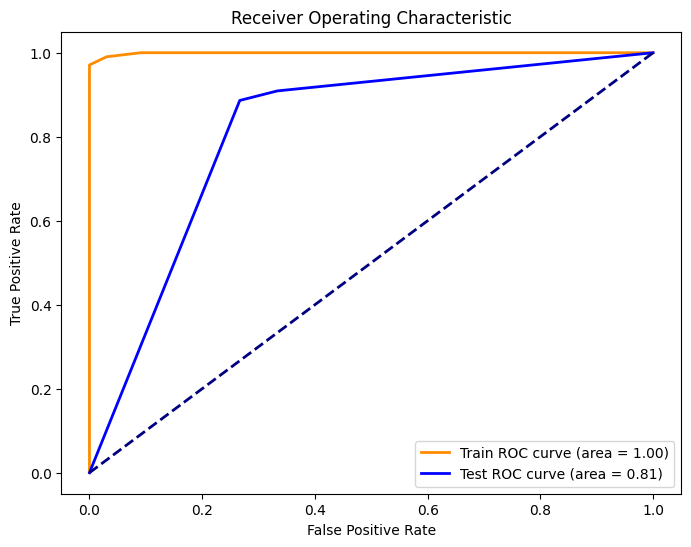

In [65]:
DTC=DecisionTreeClassifier(criterion="entropy",max_depth=8, min_samples_leaf=3 , min_samples_split=4)
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
Evaluate_Performance_AUC(DTC,X_train_scaled, X_test_scaled, y_train, y_test)

In [66]:
clf=grid_search.best_estimator_
#same as
#clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2, criterion= 'entropy')
#clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

In [67]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


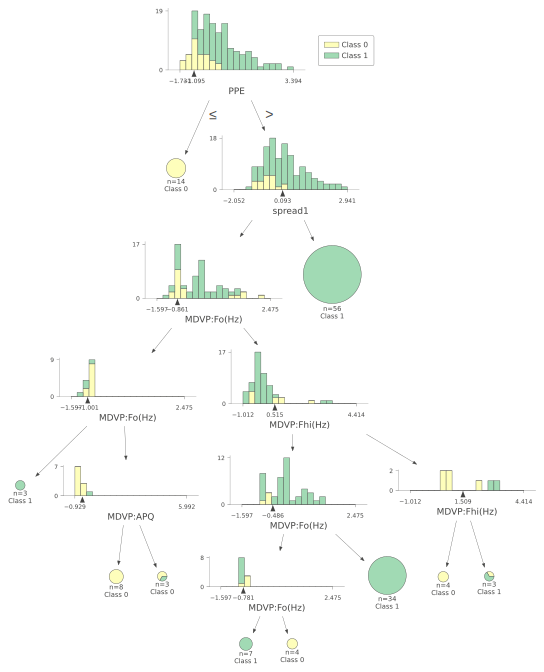

In [68]:
# plot the tree
import dtreeviz

# Getting the list of variables
feature_names = list(X_train.columns)

# visualizing the tree
viz_model = dtreeviz.model(clf,
                           X_train=X_train_scaled, y_train=y_train,
                           feature_names=feature_names)

v = viz_model.view(fancy=True)     # render as SVG into internal object
v


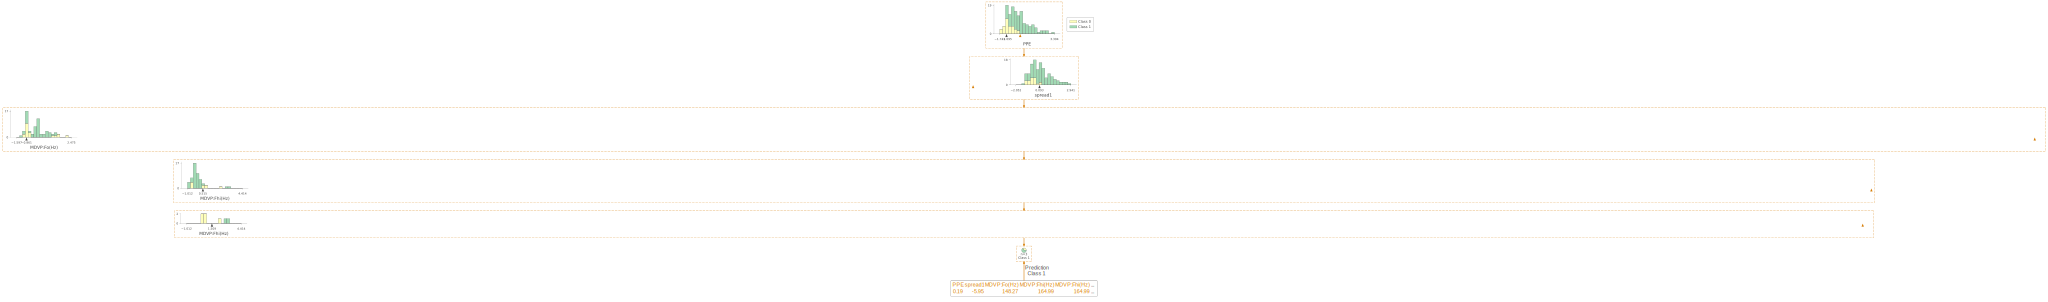

In [69]:
# get a random point
rand = np.random.randint(0, len(X))
sample_point = X.iloc[rand,:].values

# visualizing the path for the point
v = viz_model.view(fancy=True,scale=1.5,x=sample_point,show_just_path=True)
v

In [70]:

results = [
    {'Model': 'K-Nearest Neighbor', 'Precision': 0.92 , 'Recall': 0.80 ,
     'F1-Score': 0.86 , 'Testing_Accuracy': 0.93},

    {'Model': 'Logistic Regression', 'Precision': 0.875 , 'Recall': 0.96 ,
     'F1-Score': 0.9 , 'Testing_Accuracy': 0.86},


    {'Model': 'Decision Tree', 'Precision': 0.91, 'Recall': 0.95,
     'F1-Score': 0.933, 'Testing_Accuracy': 0.90},

]
results = pd.DataFrame(results).style.set_properties(**{'font-weight': 'bold'})
print("Results without balancing the dataset : ")
print('-'*70)
results



Results without balancing the dataset : 
----------------------------------------------------------------------


### ✲ 2nd Scenario : where the models will be trained and evaluated on the oversampled dataset.

## K-Nearest Neighbour

--------------------------------------------------------------------------------
K- Nearest Neighbor :
----------------

 • Training Accuracy Score :  92.23
 • Cross Validation Score : 88.81
 ❖ Testing Accuracy Score :  89.83
 • Precision Score is : 100.0
 • Recall Score is : 86.36
 • F1-Score Score is : 92.68
--------------------------------------------------------------------------------


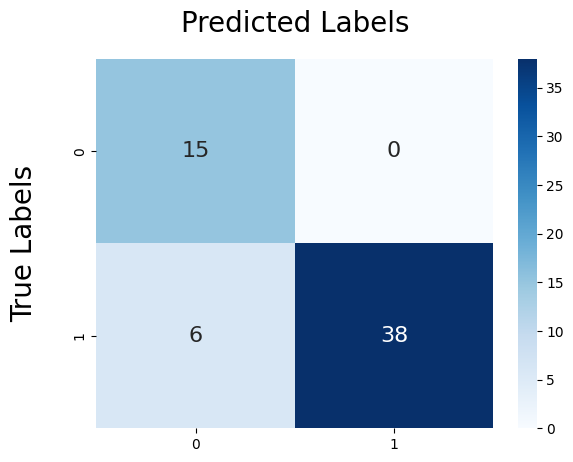

--------------------------------------------------------------------------------


In [71]:
KNN = KNeighborsClassifier( n_neighbors = 7 )
KNN.fit(X_smote_train_scaled,y_smote_train)
y_pred_KNN_smote = KNN.predict(X_smote_test_scaled)
print('-'*80)
print("K- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

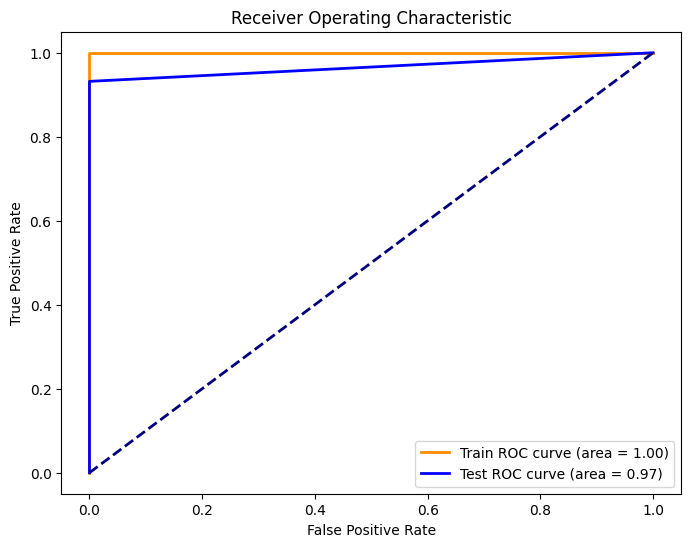

In [72]:
KNN = KNeighborsClassifier( n_neighbors = 1 )
KNN.fit(X_smote_train_scaled,y_smote_train)
y_pred_KNN_smote = KNN.predict(X_smote_test_scaled)

Evaluate_Performance_AUC(KNN, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)


### Logistic Regression

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  82.04
 • Cross Validation Score : 80.21
 ❖ Testing Accuracy Score :  83.05
 • Precision Score is : 90.48
 • Recall Score is : 86.36
 • F1-Score Score is : 88.37
--------------------------------------------------------------------------------


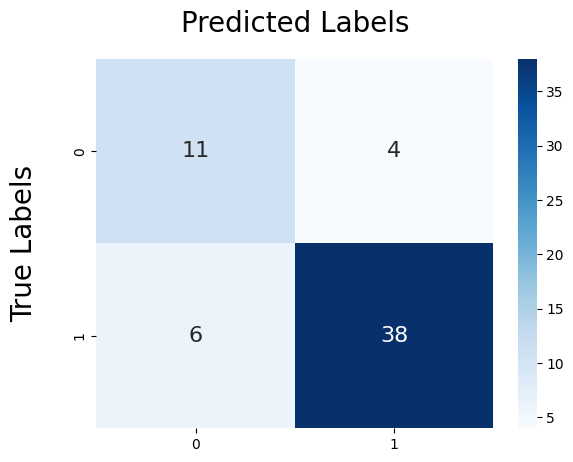

--------------------------------------------------------------------------------


In [73]:
LR = LogisticRegression()
LR.fit(X_smote_train_scaled,y_smote_train)
y_pred_LR_smote = LR.predict(X_smote_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)



In [74]:
## coefficient of the model
LR.coef_

array([[-0.40784091, -0.26664074,  0.12871502, -0.62480756, -0.58744517,
         0.55710736, -0.10735637,  0.55257804,  0.33610111,  0.33472243,
        -0.23509013,  0.46442337,  0.84404903, -0.23611308, -0.10891797,
         0.5299696 ,  0.05159045,  0.27058177,  0.56002618,  0.34931588,
         1.36357028,  1.11797512]])

In [75]:
## intercept of model
LR.intercept_

array([0.67569419])

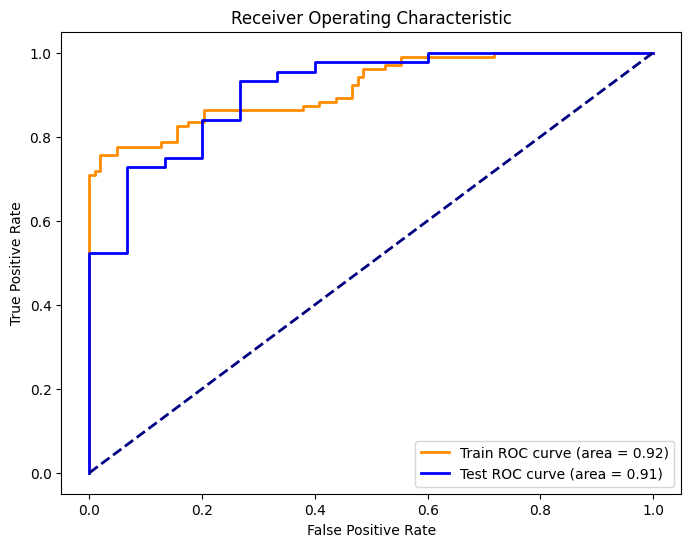

In [76]:
LR = LogisticRegression()
LR.fit(X_smote_train_scaled,y_smote_train)
y_pred_LR_smote = LR.predict(X_smote_test_scaled)
Evaluate_Performance_AUC(LR, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)



--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  82.04
 • Cross Validation Score : 80.21
 ❖ Testing Accuracy Score :  83.05
 • Precision Score is : 90.48
 • Recall Score is : 86.36
 • F1-Score Score is : 88.37
--------------------------------------------------------------------------------


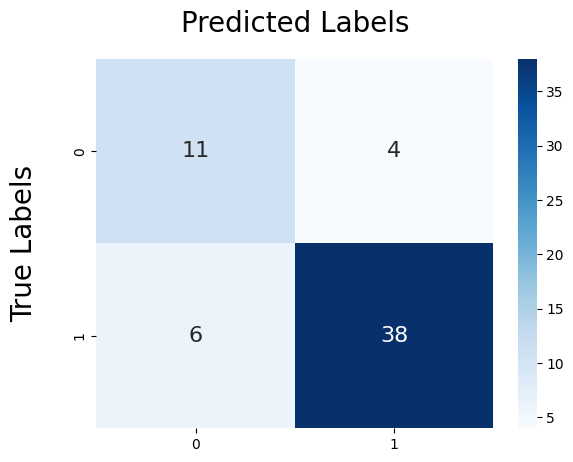

--------------------------------------------------------------------------------


In [77]:

LR = LogisticRegression()
LR.fit(X_smote_train_scaled, y_smote_train)
y_pred_LR_smote = LR.predict(X_smote_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)


### Decision Tree

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  97.09
 • Cross Validation Score : 93.24
 ❖ Testing Accuracy Score :  89.83
 • Precision Score is : 93.18
 • Recall Score is : 93.18
 • F1-Score Score is : 93.18
--------------------------------------------------------------------------------


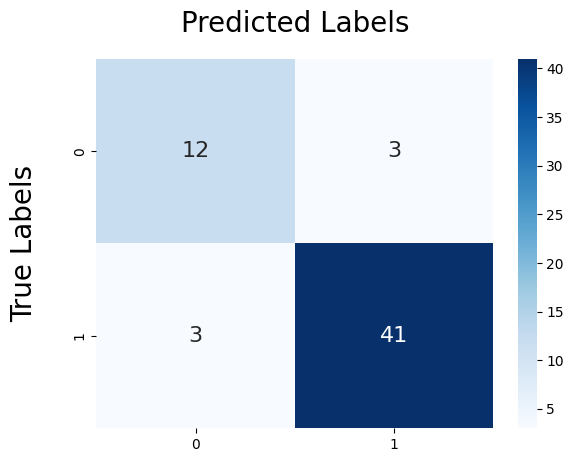

--------------------------------------------------------------------------------
--> Tree's Depth :  4 

DECISION TREE :


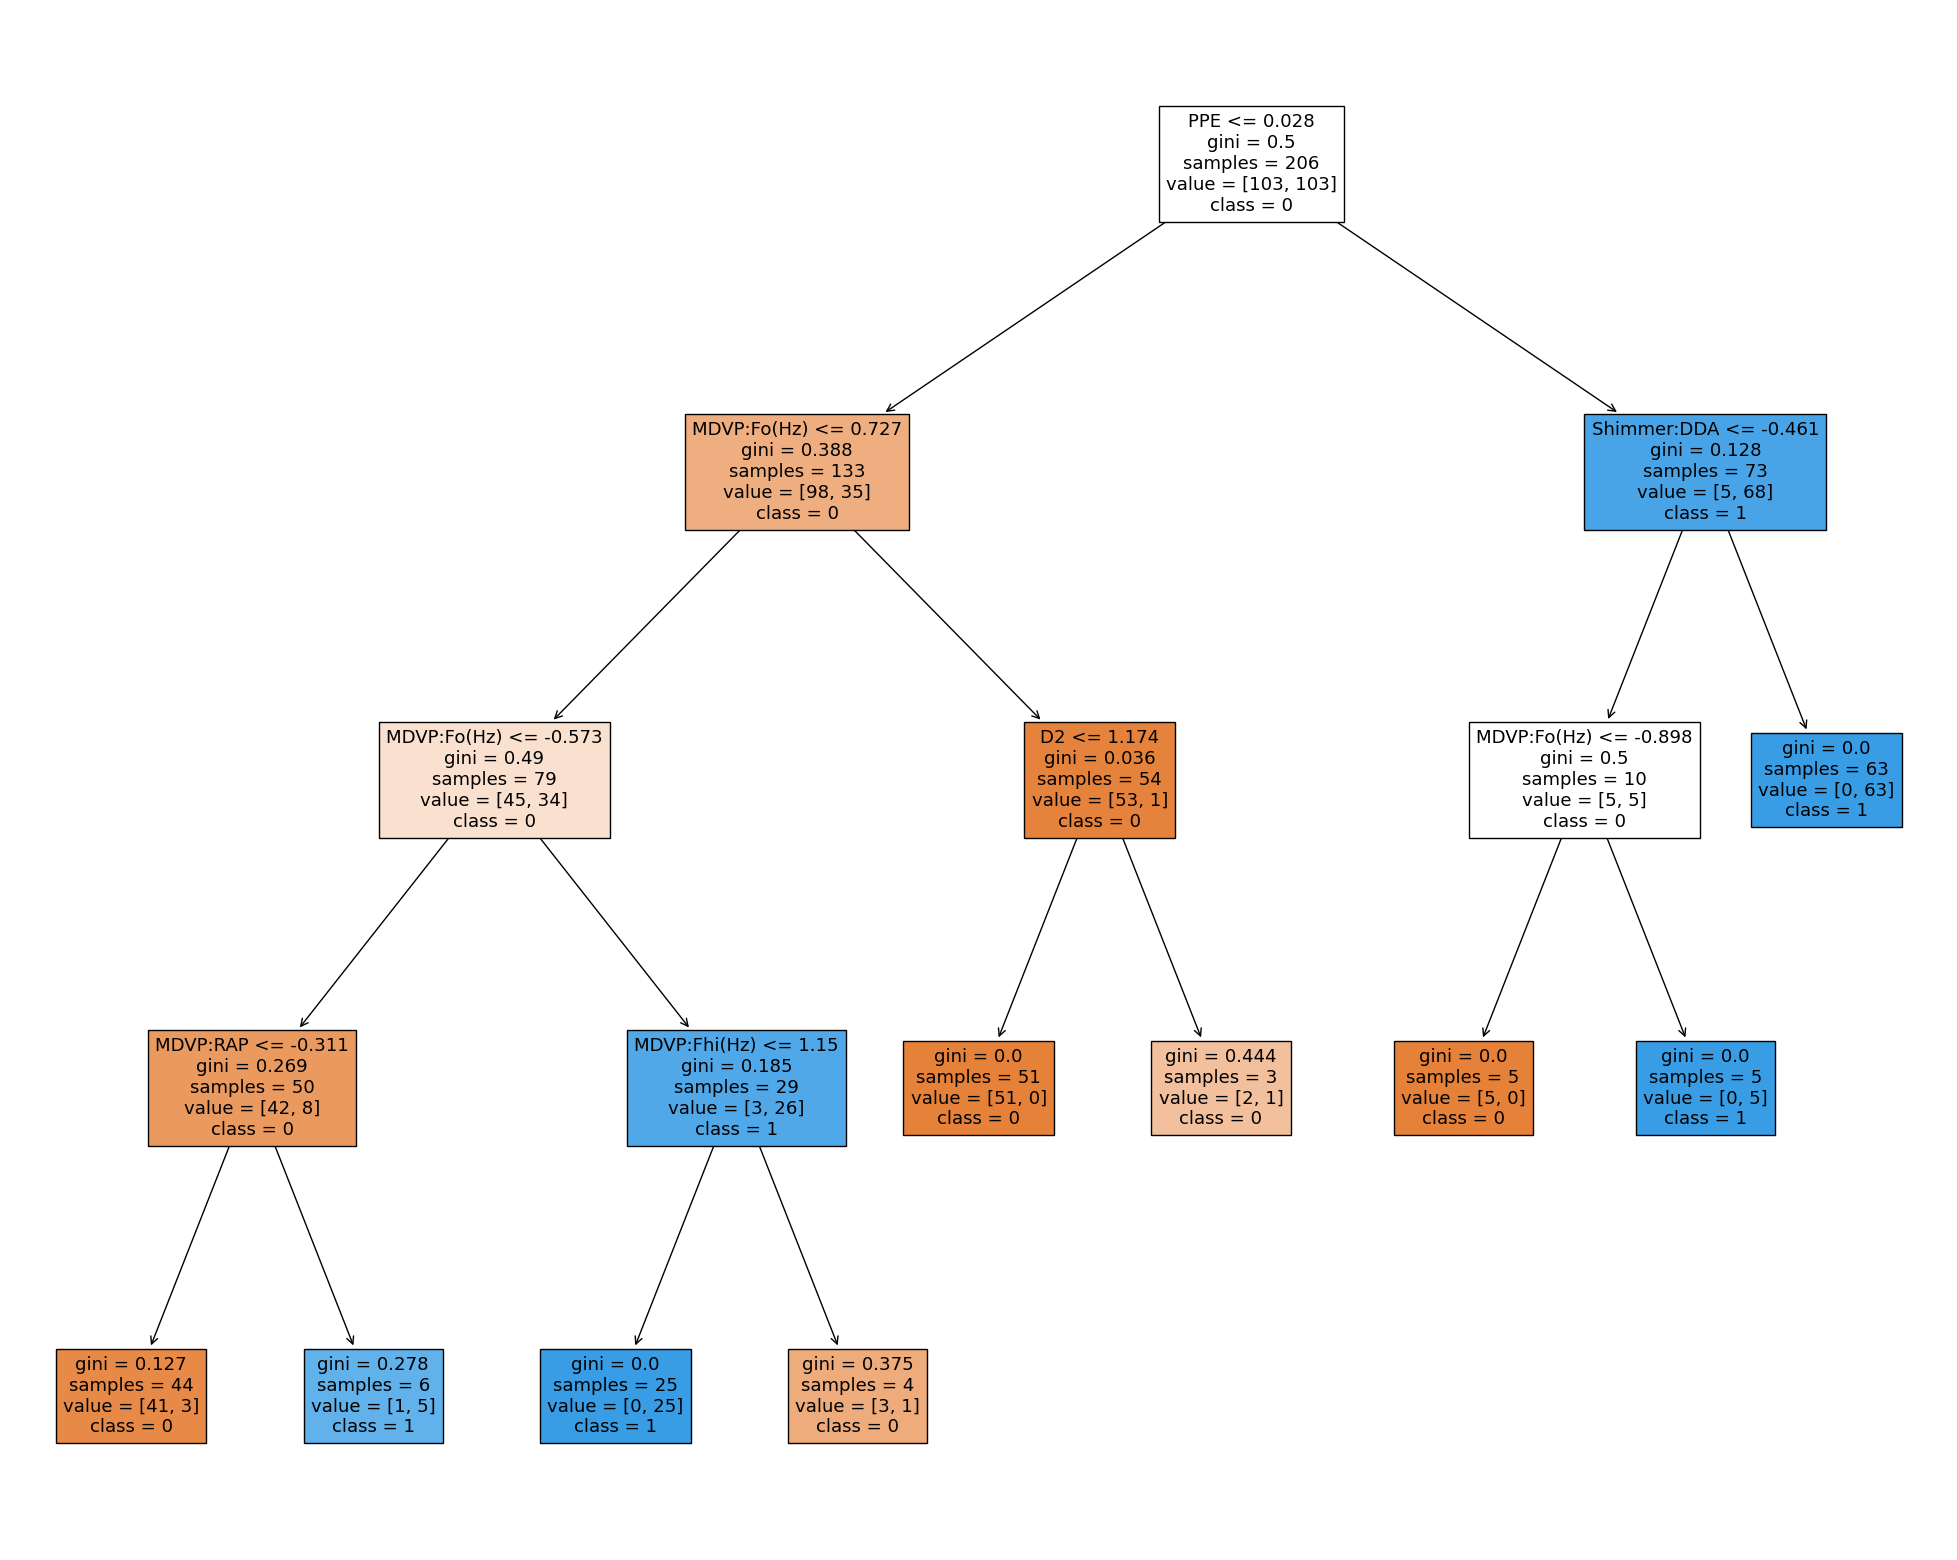

In [78]:
DTC = DecisionTreeClassifier(criterion="gini",max_depth=4, min_samples_leaf=3 , min_samples_split=4)
DTC.fit(X_smote_train_scaled,y_smote_train)
y_pred_DTC_smote = DTC.predict(X_smote_test_scaled)
print('-'*80)
print("Decision Tree Classifier :")
print("-"*16)
Evaluate_Performance(DTC, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)
print( '--> Tree\'s Depth : ',DTC.tree_.max_depth,'\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in smote_data.columns], class_names=['0','1'], filled=True)
plt.show()

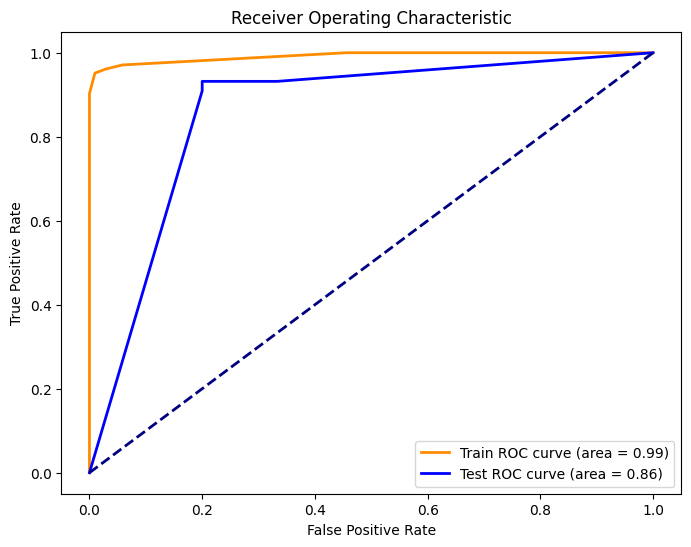

In [79]:
DTC = DecisionTreeClassifier(criterion="gini",max_depth=4, min_samples_leaf=3 , min_samples_split=4)
DTC.fit(X_smote_train_scaled,y_smote_train)
y_pred_DTC_smote = DTC.predict(X_smote_test_scaled)

Evaluate_Performance_AUC(DTC, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)


In [80]:
results = [

     {'Model': 'Decision Tree', 'Recall': recall_score(y_smote_test, y_pred_DTC_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_DTC_smote),'Test Accuracy': accuracy_score(y_smote_test, y_pred_DTC_smote)},

    {'Model': 'Logistic Regression' , 'Recall': recall_score(y_smote_test, y_pred_LR_smote) ,
     'F1-Score': f1_score(y_smote_test, y_pred_LR_smote) ,'Test Accuracy': accuracy_score(y_smote_test, y_pred_LR_smote)},



    {'Model': 'K-Nearest Neighbor', 'Recall': recall_score(y_smote_test, y_pred_KNN_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_KNN_smote),'Test Accuracy': accuracy_score(y_smote_test, y_pred_KNN_smote)},
]
smote_results = pd.DataFrame(results).style.set_properties(**{'font-weight': 'bold'})
print("Results after balancing the dataset using SMOTE Over Sampler technique : ")
print('-'*70)
smote_results



Results after balancing the dataset using SMOTE Over Sampler technique : 
----------------------------------------------------------------------


✲ Applying the SMOTE technique to balance the class distribution in our dataset, and found that this approach improved the performance of our machine learning models. Specifically, the SMOTE technique helped to reduce the bias towards the majority class and improve the accuracy of the minority class predictions, resulting in a more balanced and accurate model overall.

✲ While achieving 100% accuracy on both the training and testing sets may seem like an ideal scenario, it is not always the best indicator of model performance. In fact, achieving perfect accuracy on both sets can sometimes be a sign of overfitting, where the model has simply memorized the training data and may not generalize well to new, unseen data. In contrast, a model with high accuracy on the training set but slightly lower accuracy on the testing set may indicate better generalization to new data. This is because the model has learned to identify patterns in the training data that are also present in the testing data, rather than simply memorizing the training set.

✲ Based on our analysis and evaluation, we recommend using the Key- Nearest Neighbor model over the Random Forest model for this particular problem

## Naive Bayes

##PCA

In [81]:
df1 = parkinsons_data.loc[ : , parkinsons_data.columns != 'name']
df1= df1.loc[ : ,df1.columns != 'status']

Without Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [83]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(df1)

PCA(random_state=42, svd_solver='randomized')

In [84]:
pca.components_

array([[ 2.22364991e-01,  9.71437964e-01,  8.28189323e-02,
         4.14767107e-06, -2.83136911e-08,  2.56969261e-06,
         2.12016448e-06,  7.70661514e-06, -2.63624889e-06,
         6.13991451e-05, -2.02778896e-06, -2.61539880e-06,
        -1.28463205e-06, -6.08043054e-06,  6.45150204e-05,
        -4.60035667e-04, -1.77833510e-04, -2.20029474e-04,
        -1.50117719e-03, -3.27752276e-05,  7.41662225e-04,
        -1.11616717e-04],
       [ 5.89844226e-01, -2.01668765e-01,  7.81720694e-01,
        -1.77392401e-05, -2.43238835e-07, -8.07945167e-06,
        -8.15195837e-06, -2.42346303e-05, -5.34692056e-05,
        -4.99890983e-04, -2.88267097e-05, -2.31549396e-05,
        -3.68998627e-05, -8.64815748e-05, -1.12825869e-04,
         1.54677986e-02, -8.31903608e-04, -1.32614626e-04,
        -9.23244607e-03, -4.57598765e-04, -3.47637020e-04,
        -6.68816813e-04],
       [-7.76167708e-01,  1.25048543e-01,  6.17436105e-01,
         8.82919452e-06,  2.49785514e-07,  3.75996708e-06,
    

In [85]:
comp = list(range(1,23))

eigen_value = pca.explained_variance_
eigen_value = list(eigen_value)
eigen_value = [round(t,10) for t in eigen_value]
eigen_value

[8747.1446843031,
 2618.7055886528,
 613.3967794168,
 19.1233319702,
 0.4798595335,
 0.0733504521,
 0.0122680678,
 0.0056426974,
 0.0031733736,
 0.0013859116,
 0.000537345,
 0.0004235205,
 7.08123e-05,
 1.59183e-05,
 7.7234e-06,
 3.0623e-06,
 5.036e-07,
 2.053e-07,
 5.85e-08,
 0.0,
 0.0,
 0.0]

In [86]:
var_proportion = pca.explained_variance_ratio_
var_proportion = list(var_proportion)
var_proportion = [round(t,10) for t in var_proportion]
var_proportion

[0.7289926853,
 0.2182446144,
 0.0511208836,
 0.0015937508,
 3.99918e-05,
 6.1131e-06,
 1.0224e-06,
 4.703e-07,
 2.645e-07,
 1.155e-07,
 4.48e-08,
 3.53e-08,
 5.9e-09,
 1.3e-09,
 6e-10,
 3e-10,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [87]:
Cumulative_var = np.cumsum(pca.explained_variance_ratio_)
Cumulative_var = list(Cumulative_var)
Cumulative_var = [round(t,10) for t in Cumulative_var]
Cumulative_var

[0.7289926853,
 0.9472372997,
 0.9983581834,
 0.9999519342,
 0.999991926,
 0.9999980391,
 0.9999990615,
 0.9999995318,
 0.9999997962,
 0.9999999117,
 0.9999999565,
 0.9999999918,
 0.9999999977,
 0.999999999,
 0.9999999997,
 0.9999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

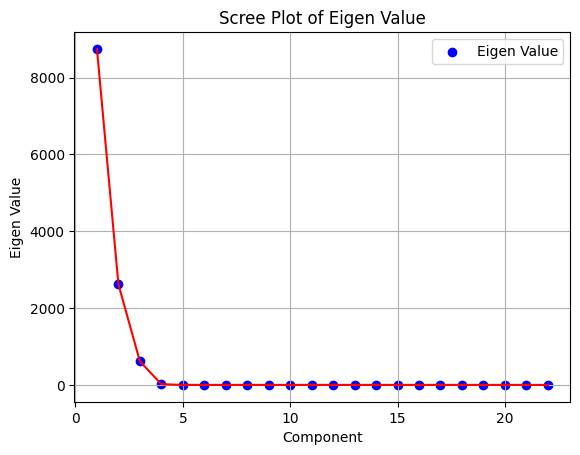

In [88]:
x = comp
y = eigen_value
# Create a scatter plot of the points
plt.scatter(x, y, color='blue', marker='o', label='Eigen Value')

# Connect the points with lines
plt.plot(x, y, linestyle='-', color='red')

# Add labels and a legend
plt.xlabel('Component')
plt.ylabel('Eigen Value')
plt.title('Scree Plot of Eigen Value')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

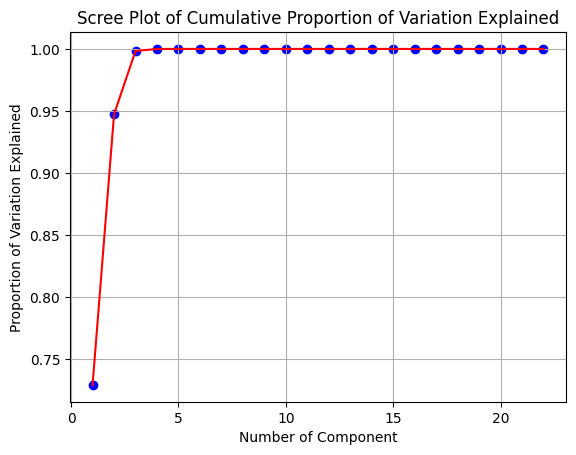

In [89]:
x = comp
y = Cumulative_var
# Create a scatter plot of the points
plt.scatter(x, y, color='blue', marker='o')

# Connect the points with lines
plt.plot(x, y, linestyle='-', color='red')

# Add labels and a legend
plt.xlabel('Number of Component')
plt.ylabel('Proportion of Variation Explained')
plt.title('Scree Plot of Cumulative Proportion of Variation Explained')


# Show the plot
plt.grid(True)
plt.show()

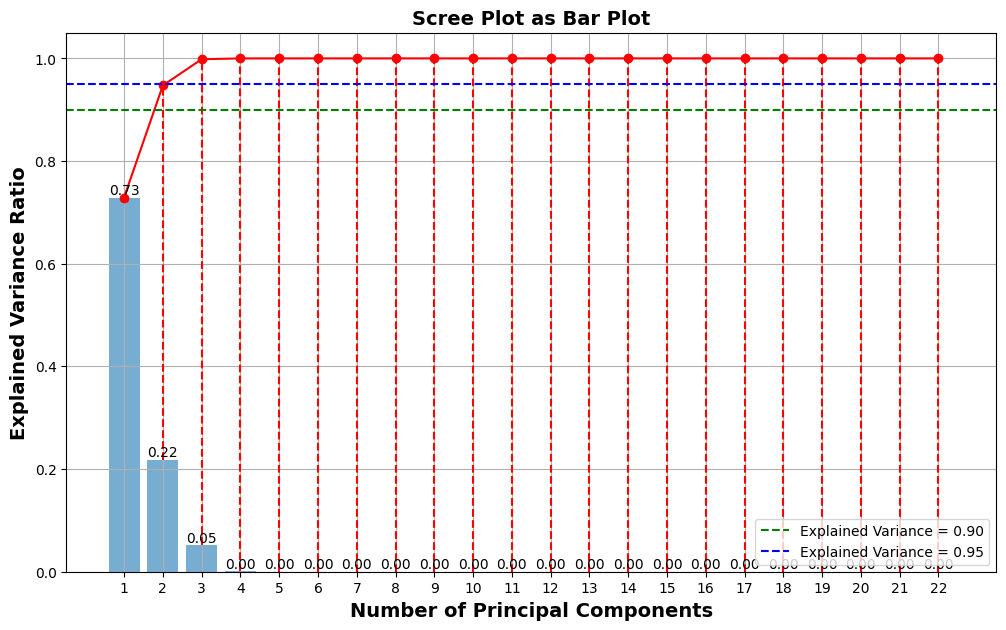

In [90]:
# Get the explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create a bar plot
plt.figure(figsize=(12, 7))
plt.bar(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center', alpha=0.6)
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Principal Components', fontsize = 14, fontweight = 'bold')
plt.ylabel('Explained Variance Ratio', fontsize = 14, fontweight = 'bold')
plt.title('Scree Plot as Bar Plot', fontsize = 14, fontweight = 'bold')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)

# Add text labels for the values at the top of each bar
for i, val in enumerate(explained_variance_ratio):
    plt.text(i + 1, val, f'{val:.2f}', ha='center', va='bottom')

# Add lines connecting bars to their corresponding values
for i, val in enumerate(explained_variance_ratio):
    plt.plot([i + 1, i + 1], [val, cumulative_explained_variance[i]], color='r', linestyle='--')

# Add horizontal lines at y = 0.90 and y = 0.95
plt.axhline(y=0.90, color='g', linestyle='--', label='Explained Variance = 0.90')
plt.axhline(y=0.95, color='b', linestyle='--', label='Explained Variance = 0.95')

# Display the legend
plt.legend()

plt.show()

In [91]:
colnames = list(df1.columns)
prinComp_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
prinComp_df

Feature           PC1           PC2
0        MDVP:Fo(Hz)  2.223650e-01  5.898442e-01
1       MDVP:Fhi(Hz)  9.714380e-01 -2.016688e-01
2       MDVP:Flo(Hz)  8.281893e-02  7.817207e-01
3     MDVP:Jitter(%)  4.147671e-06 -1.773924e-05
4   MDVP:Jitter(Abs) -2.831369e-08 -2.432388e-07
5           MDVP:RAP  2.569693e-06 -8.079452e-06
6           MDVP:PPQ  2.120164e-06 -8.151958e-06
7         Jitter:DDP  7.706615e-06 -2.423463e-05
8       MDVP:Shimmer -2.636249e-06 -5.346921e-05
9   MDVP:Shimmer(dB)  6.139915e-05 -4.998910e-04
10      Shimmer:APQ3 -2.027789e-06 -2.882671e-05
11      Shimmer:APQ5 -2.615399e-06 -2.315494e-05
12          MDVP:APQ -1.284632e-06 -3.689986e-05
13       Shimmer:DDA -6.080431e-06 -8.648157e-05
14               NHR  6.451502e-05 -1.128259e-04
15               HNR -4.600357e-04  1.546780e-02
16              RPDE -1.778335e-04 -8.319036e-04
17               DFA -2.200295e-04 -1.326146e-04
18           spread1 -1.501177e-03 -9.232446e-03
19           spread2 -3.277523e-05 -4.575988e-04
20                D2  7.416622e-04 -3.476370e-04
21               PPE -1.116167e-04 -6.688168e-04

In [92]:
# Define conditions for highlighting for each column
pc1_condition = (abs(prinComp_df['PC1']) >=0.5)
pc2_condition = (abs(prinComp_df['PC2']) >= 0.5)

# Create a Styler object
styled_df = prinComp_df.style

# Apply conditional formatting to each column based on its condition
styled_df.applymap(lambda x: 'background-color: lightblue', subset=pd.IndexSlice[prinComp_df[pc1_condition].index, 'PC1'])
styled_df.applymap(lambda x: 'background-color: lightblue', subset=pd.IndexSlice[prinComp_df[pc2_condition].index, 'PC2'])
styled_df

In [93]:
x_s = prinComp_df['Feature']
x_s

0          MDVP:Fo(Hz)
1         MDVP:Fhi(Hz)
2         MDVP:Flo(Hz)
3       MDVP:Jitter(%)
4     MDVP:Jitter(Abs)
5             MDVP:RAP
6             MDVP:PPQ
7           Jitter:DDP
8         MDVP:Shimmer
9     MDVP:Shimmer(dB)
10        Shimmer:APQ3
11        Shimmer:APQ5
12            MDVP:APQ
13         Shimmer:DDA
14                 NHR
15                 HNR
16                RPDE
17                 DFA
18             spread1
19             spread2
20                  D2
21                 PPE
Name: Feature, dtype: object

In [94]:
y_s = prinComp_df[:0]
y_s = list(y_s)
y_s[1:]

['PC1', 'PC2']

In [95]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

In [96]:
eigenvalues

array([8.74714468e+03, 2.61870559e+03, 6.13396779e+02, 1.91233320e+01,
       4.79859534e-01, 7.33504521e-02, 1.22680678e-02, 5.64269738e-03,
       3.17337362e-03, 1.38591161e-03, 5.37344992e-04, 4.23520456e-04,
       7.08122711e-05, 1.59183026e-05, 7.72341398e-06, 3.06228258e-06,
       5.03561820e-07, 2.05343138e-07, 5.84538963e-08, 2.61255743e-11,
       6.53572933e-12, 5.37271771e-12])

In [97]:
variance = df1.var()
variance.values

array([1.71313746e+03, 8.37070329e+03, 1.89411341e+03, 2.35044003e-05,
       1.21256532e-09, 8.80768499e-06, 7.61195214e-06, 7.92695407e-05,
       3.55583879e-04, 3.79771582e-02, 1.03086690e-04, 1.44569495e-04,
       2.87191869e-04, 9.27757957e-04, 1.63365098e-03, 1.95873894e+01,
       1.08038799e-02, 3.06205412e-03, 1.18855297e+00, 6.95652124e-03,
       1.46535110e-01, 8.12149228e-03])

In [98]:
rho_mat = np.zeros((2, 22))
for i in range(2):
    for j in range(22):
        rho_mat[i][j]=np.round(eigenvectors[i][j]*(eigenvalues[i]**0.5)/((variance[j])**0.5),3)


# Create a DataFrame with column and index labels
rho_df = pd.DataFrame(data=rho_mat, index=y_s[1:], columns=x_s)
rho_df_fin = rho_df.transpose()

rho_df_fin

PC1    PC2
Feature                       
MDVP:Fo(Hz)       0.502  0.729
MDVP:Fhi(Hz)      0.993 -0.113
MDVP:Flo(Hz)      0.178  0.919
MDVP:Jitter(%)    0.080 -0.187
MDVP:Jitter(Abs) -0.076 -0.357
MDVP:RAP          0.081 -0.139
MDVP:PPQ          0.072 -0.151
Jitter:DDP        0.081 -0.139
MDVP:Shimmer     -0.013 -0.145
MDVP:Shimmer(dB)  0.029 -0.131
Shimmer:APQ3     -0.019 -0.145
Shimmer:APQ5     -0.020 -0.099
MDVP:APQ         -0.007 -0.111
Shimmer:DDA      -0.019 -0.145
NHR               0.149 -0.143
HNR              -0.010  0.179
RPDE             -0.160 -0.410
DFA              -0.372 -0.123
spread1          -0.129 -0.433
spread2          -0.037 -0.281
D2                0.181 -0.046
PPE              -0.116 -0.380

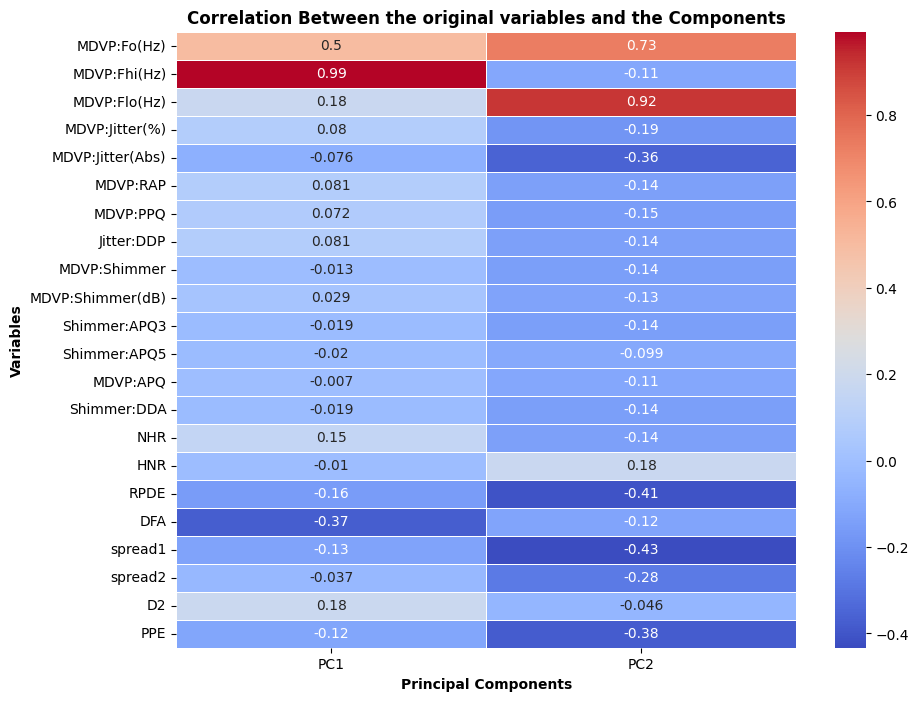

In [99]:
#Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(rho_df_fin, annot=True, cmap='coolwarm', linewidths=0.5)

# Set axis labels and plot title
plt.xlabel('Principal Components',fontweight = 'bold')
plt.ylabel('Variables',fontweight = 'bold')
plt.title('Correlation Between the original variables and the Components',fontweight = 'bold')

# Show the plot
plt.show()

# PCA after Standardization

In [100]:
scaler = StandardScaler()

In [101]:
# Get all column names and store them in a list
column_names = df1.columns.tolist()
column_names

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [102]:
# Fit and transform the selected columns
df1[column_names] = scaler.fit_transform(df[column_names])
df1.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1  \
0  0.332985     0.607532 -0.067893 -0.193225 -0.807838  1.760814  0.801323   
1  1.159454     1.548254 -0.137843 -0.634508 -0.387524  1.837562  1.479853   
2  0.699187     1.175323 -0.291633 -0.279760 -0.662075  1.942048  1.141445   
3  0.806859     1.340229 -0.280719 -0.281346 -0.613134  1.832380  1.440945   
4  1.216839     1.899461 -0.178026 -0.506745 -0.783021  1.909364  1.780940   

    spread2        D2       PPE  
0  0.480477 -0.210531  0.868886  
1  1.311185  0.275077  1.803605  
2  1.017682 -0.103629  1.402661  
3  1.293840  0.062145  1.806954  
4  0.096195 -0.130026  2.267082  

[5 rows x 22 columns]

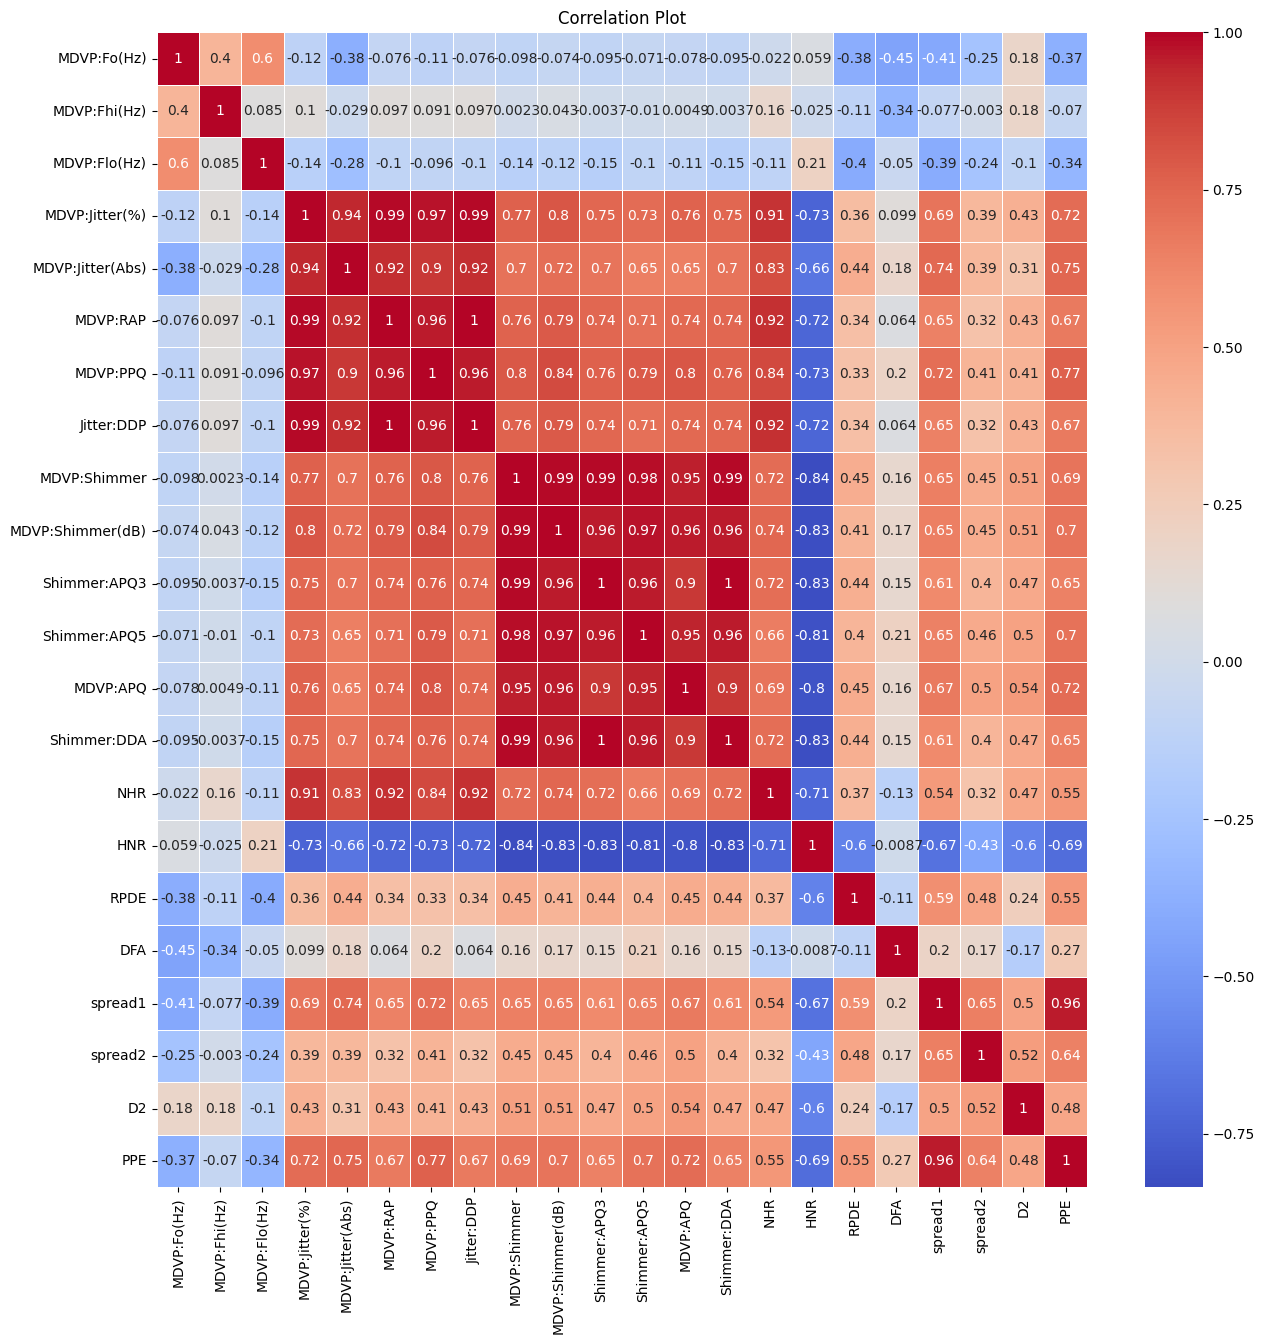

In [103]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a correlation plot using seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [104]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(df1)

pca.components_

array([[-5.33311130e-02,  6.71250123e-03, -6.38194233e-02,
         2.54513242e-01,  2.41680694e-01,  2.49823572e-01,
         2.56529589e-01,  2.49818891e-01,  2.59999993e-01,
         2.61771316e-01,  2.53373518e-01,  2.52378069e-01,
         2.53638407e-01,  2.53374956e-01,  2.33907706e-01,
        -2.42057884e-01,  1.46730460e-01,  4.10133612e-02,
         2.23707405e-01,  1.50741274e-01,  1.54919428e-01,
         2.31061601e-01],
       [ 5.53401031e-01,  3.48781527e-01,  3.95480272e-01,
         8.17892882e-02, -7.67725510e-02,  1.16037921e-01,
         6.81016256e-02,  1.16045531e-01,  5.25564047e-02,
         7.62693074e-02,  5.89148497e-02,  5.00848875e-02,
         4.77630972e-02,  5.89157681e-02,  1.70537848e-01,
        -3.70697101e-02, -2.48594824e-01, -3.10782347e-01,
        -2.39310009e-01, -2.04217766e-01,  1.32811370e-01,
        -2.13950837e-01],
       [ 1.28288111e-01,  2.67643023e-01, -2.32845237e-01,
        -1.50674500e-01, -1.85289885e-01, -1.69213206e-01,
    

In [105]:
eigen_value = pca.explained_variance_
eigen_value = list(eigen_value)
eigen_value = [round(t,5) for t in eigen_value]



var_proportion = pca.explained_variance_ratio_
var_proportion = list(var_proportion)
var_proportion = [round(t,5) for t in var_proportion]


Cumulative_var = np.cumsum(pca.explained_variance_ratio_)
Cumulative_var = list(Cumulative_var)
Cumulative_var = [round(t,5) for t in Cumulative_var]


In [106]:
data = {'Component':comp, 'Eigen Value':eigen_value, 'Proportion of Variation Explained':var_proportion, 'Cumulative Proportion of Variation Explained':Cumulative_var}
stat = pd.DataFrame(data)
stat

Component  Eigen Value  Proportion of Variation Explained  \
0           1     13.02491                            0.58901   
1           2      2.49869                            0.11299   
2           3      1.54998                            0.07009   
3           4      1.47254                            0.06659   
4           5      0.97894                            0.04427   
5           6      0.73287                            0.03314   
6           7      0.55509                            0.02510   
7           8      0.36427                            0.01647   
8           9      0.29133                            0.01317   
9          10      0.22528                            0.01019   
10         11      0.14129                            0.00639   
11         12      0.10538                            0.00477   
12         13      0.07010                            0.00317   
13         14      0.03836                            0.00173   
14         15      0.02213                            0.00100   
15         16      0.01788                            0.00081   
16         17      0.01252                            0.00057   
17         18      0.00725                            0.00033   
18         19      0.00351                            0.00016   
19         20      0.00109                            0.00005   
20         21      0.00000                            0.00000   
21         22      0.00000                            0.00000   

    Cumulative Proportion of Variation Explained  
0                                        0.58901  
1                                        0.70200  
2                                        0.77209  
3                                        0.83868  
4                                        0.88295  
5                                        0.91609  
6                                        0.94119  
7                                        0.95767  
8                                        0.97084  
9                                        0.98103  
10                                       0.98742  
11                                       0.99218  
12                                       0.99535  
13                                       0.99709  
14                                       0.99809  
15                                       0.99890  
16                                       0.99946  
17                                       0.99979  
18                                       0.99995  
19                                       1.00000  
20                                       1.00000  
21                                       1.00000

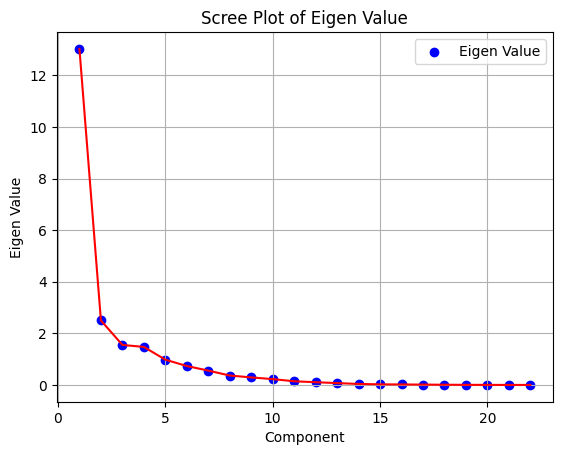

In [107]:
x = comp
y = eigen_value
# Create a scatter plot of the points
plt.scatter(x, y, color='blue', marker='o', label='Eigen Value')

# Connect the points with lines
plt.plot(x, y, linestyle='-', color='red')

# Add labels and a legend
plt.xlabel('Component')
plt.ylabel('Eigen Value')
plt.title('Scree Plot of Eigen Value')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

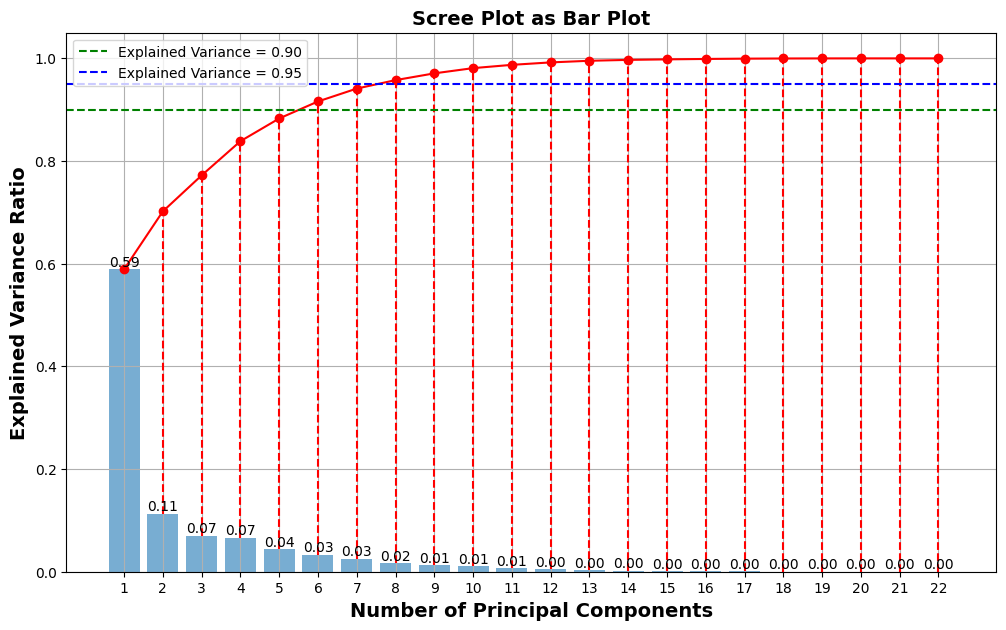

In [108]:
# Get the explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create a bar plot
plt.figure(figsize=(12, 7))
plt.bar(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center', alpha=0.6)
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Principal Components', fontsize = 14, fontweight = 'bold')
plt.ylabel('Explained Variance Ratio', fontsize = 14, fontweight = 'bold')
plt.title('Scree Plot as Bar Plot', fontsize = 14, fontweight = 'bold')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)

# Add text labels for the values at the top of each bar
for i, val in enumerate(explained_variance_ratio):
    plt.text(i + 1, val, f'{val:.2f}', ha='center', va='bottom')

# Add lines connecting bars to their corresponding values
for i, val in enumerate(explained_variance_ratio):
    plt.plot([i + 1, i + 1], [val, cumulative_explained_variance[i]], color='r', linestyle='--')

# Add horizontal lines at y = 0.90 and y = 0.95
plt.axhline(y=0.90, color='g', linestyle='--', label='Explained Variance = 0.90')
plt.axhline(y=0.95, color='b', linestyle='--', label='Explained Variance = 0.95')

# Display the legend
plt.legend()

plt.show()

## Naive Bayes

### On Unbalanced Dataset

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

X=parkinsons_data.drop(['name','status'],axis=1)
y=parkinsons_data["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_pca, y_train)


y_pred = naive_bayes_classifier.predict(X_test_pca)


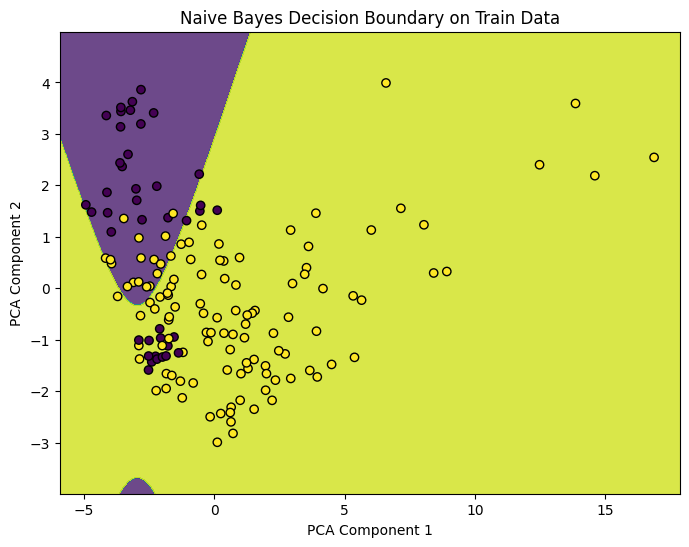

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already applied PCA and have X_pca as the 2D PCA-transformed data
# Assuming you have trained a Naive Bayes classifier named clf_nb

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = naive_bayes_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.title('Naive Bayes Decision Boundary on Train Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


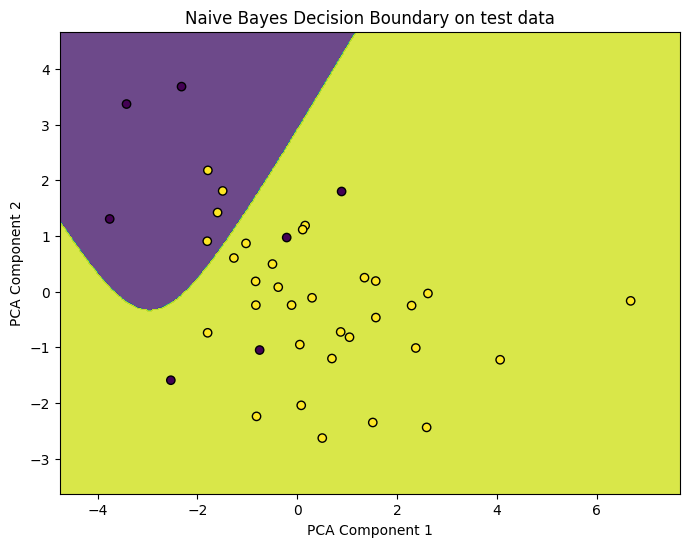

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already applied PCA and have X_pca as the 2D PCA-transformed data
# Assuming you have trained a Naive Bayes classifier named clf_nb

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = naive_bayes_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolors='k')
plt.title('Naive Bayes Decision Boundary on test data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



 • Training Accuracy Score :  77.56
 • Cross Validation Score : 76.21
 ❖ Testing Accuracy Score :  79.49
 • Precision Score is : 87.5
 • Recall Score is : 87.5
 • F1-Score Score is : 87.5
--------------------------------------------------------------------------------


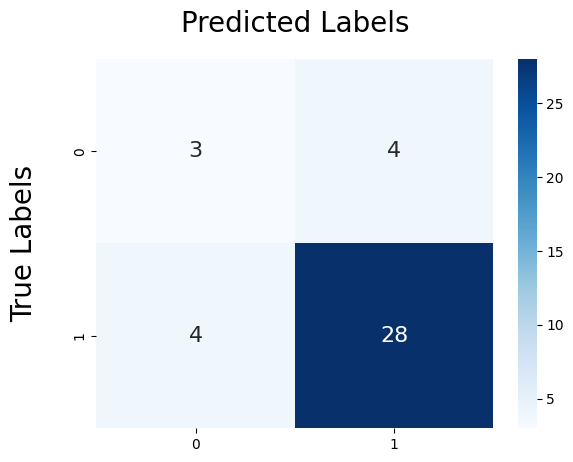

--------------------------------------------------------------------------------


In [112]:
Evaluate_Performance(GaussianNB(), X_train_pca, X_test_pca, y_train, y_test)

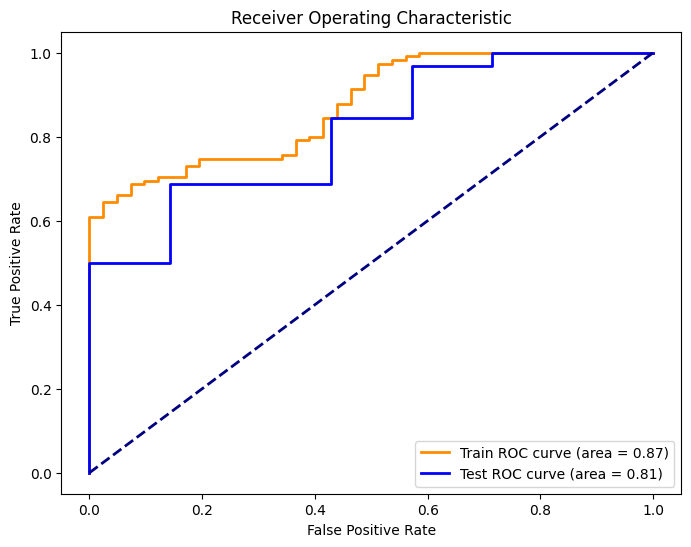

In [113]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_pca, y_train)


Evaluate_Performance_AUC(naive_bayes_classifier, X_train_pca, X_test_pca, y_train, y_test)

### On Balanced Dataset

In [114]:
from sklearn.preprocessing import StandardScaler

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA on Training Data
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)

# Step 4: Balance Data with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pca, y_train)

# Step 5: Train Naive Bayes
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_balanced, y_train_balanced)

# Step 6: Apply PCA on Test Data
X_test_pca = pca.transform(X_test_scaled)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test_pca)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)


In [115]:
naive_bayes_classifier.class_prior_

array([0.5, 0.5])

In [116]:
naive_bayes_classifier.theta_

array([[-2.56856691,  0.92474377],
       [ 0.84296212, -0.3315328 ]])


 • Training Accuracy Score :  81.07
 • Cross Validation Score : 80.57
 ❖ Testing Accuracy Score :  76.27
 • Precision Score is : 89.47
 • Recall Score is : 77.27
 • F1-Score Score is : 82.93
--------------------------------------------------------------------------------


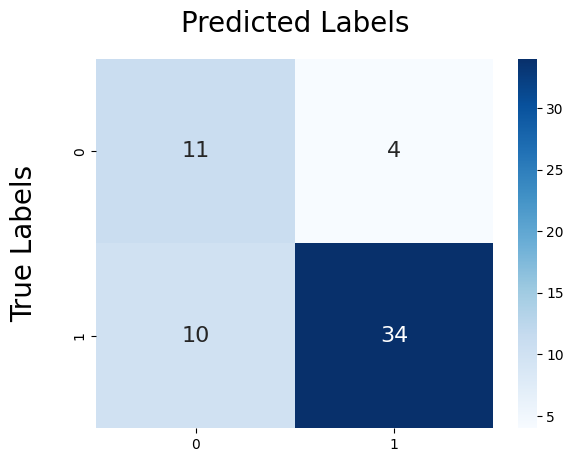

--------------------------------------------------------------------------------


In [117]:
Evaluate_Performance(GaussianNB(), X_train_balanced, X_test_pca, y_train_balanced, y_test)

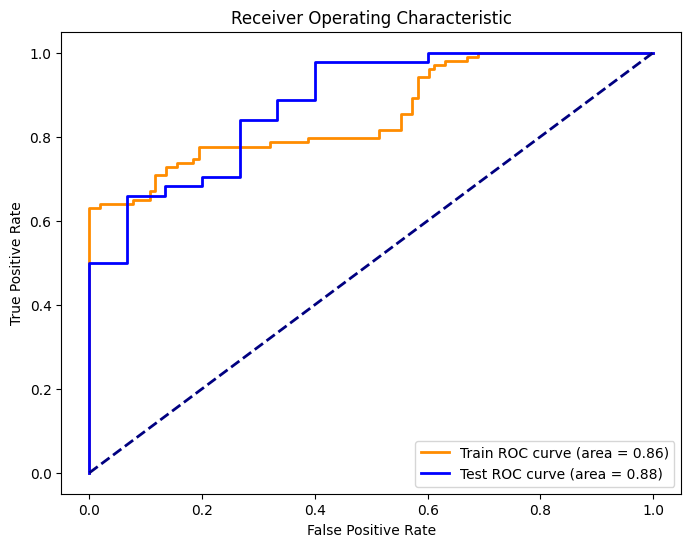

In [118]:
# Step 5: Train Naive Bayes
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_balanced, y_train_balanced)
Evaluate_Performance_AUC(naive_bayes_classifier , X_train_balanced, X_test_pca, y_train_balanced, y_test)

##Linear Discriminant Analysis

## Unbalanced data

In [119]:
X=parkinsons_data.drop(['name','status'],axis=1)
y=parkinsons_data["status"]

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

X=parkinsons_data.drop(['name','status'],axis=1)
y=parkinsons_data["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf_lda = LinearDiscriminantAnalysis(store_covariance=True)
clf_lda.fit(X_train_pca,y_train)
y_pred = clf_lda.predict(X_test_pca)
y_fit =  clf_lda.predict(X_train_pca)

In [121]:
clf_lda.means_

array([[-2.60836564,  1.11338809],
       [ 0.92993906, -0.39694706]])

In [122]:
clf_lda.covariance_

array([[11.01453959,  1.03538307],
       [ 1.03538307,  2.12022943]])

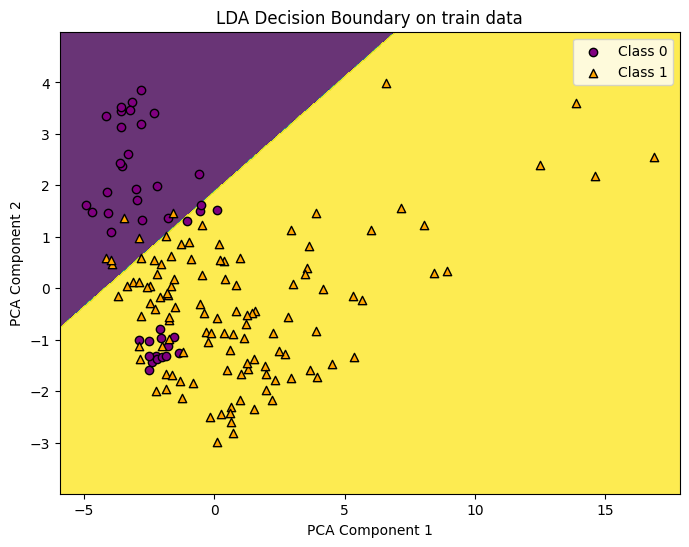

In [123]:
# Assuming clf_lda is already trained

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = clf_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Get the unique colors used in the scatter points
scatter_colors = ['purple', 'orange']

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, extend='both')

# Scatter plot for Class 0
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], c='purple', edgecolors='k', label='Class 0', marker='o')

# Scatter plot for Class 1
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], c='orange', edgecolors='k', label='Class 1', marker='^')

plt.title('LDA Decision Boundary on train data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()  # Add legend
plt.show()

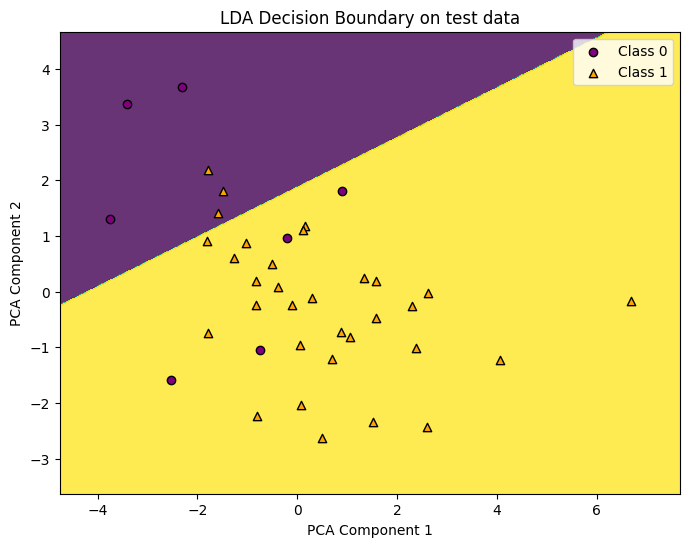

In [124]:
# Assuming clf_lda is already trained

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = clf_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Get the unique colors used in the scatter points
scatter_colors = ['purple', 'orange']

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, extend='both')

# Scatter plot for Class 0
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], c='purple', edgecolors='k', label='Class 0', marker='o')

# Scatter plot for Class 1
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], c='orange', edgecolors='k', label='Class 1', marker='^')

plt.title('LDA Decision Boundary on test data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()  # Add legend
plt.show()


 • Training Accuracy Score :  84.62
 • Cross Validation Score : 83.87
 ❖ Testing Accuracy Score :  82.05
 • Precision Score is : 87.88
 • Recall Score is : 90.62
 • F1-Score Score is : 89.23
--------------------------------------------------------------------------------


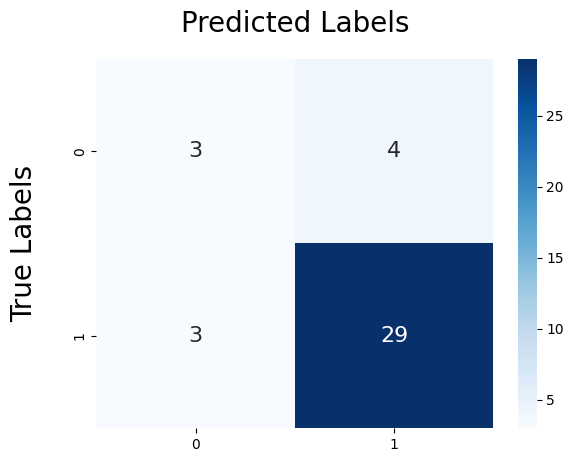

--------------------------------------------------------------------------------


In [125]:
Evaluate_Performance(LinearDiscriminantAnalysis() , X_train_pca, X_test_pca, y_train, y_test)

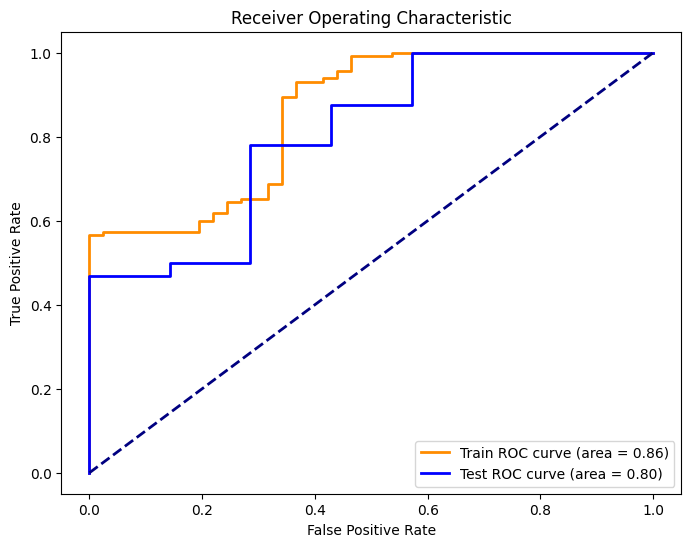

In [126]:
Evaluate_Performance_AUC(clf_lda, X_train_pca, X_test_pca, y_train, y_test)

## Balanced data

In [127]:
from sklearn.preprocessing import StandardScaler

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA on Training Data
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)

# Step 4: Balance Data with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pca, y_train)

# Step 5: Train Naive Bayes
clf_lda = LinearDiscriminantAnalysis(store_covariance=True)
clf_lda.fit(X_train_balanced,y_train_balanced)

# Step 6: Apply PCA on Test Data
X_test_pca = pca.transform(X_test_scaled)

# Predict on the test set
y_pred = clf_lda.predict(X_test_pca)
y_fit =  clf_lda.predict(X_train_pca)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)


In [128]:
clf_lda.means_

array([[-2.56856691,  0.92474377],
       [ 0.84296212, -0.3315328 ]])

In [129]:
clf_lda.covariance_

array([[7.79933724, 0.32399011],
       [0.32399011, 2.68017604]])

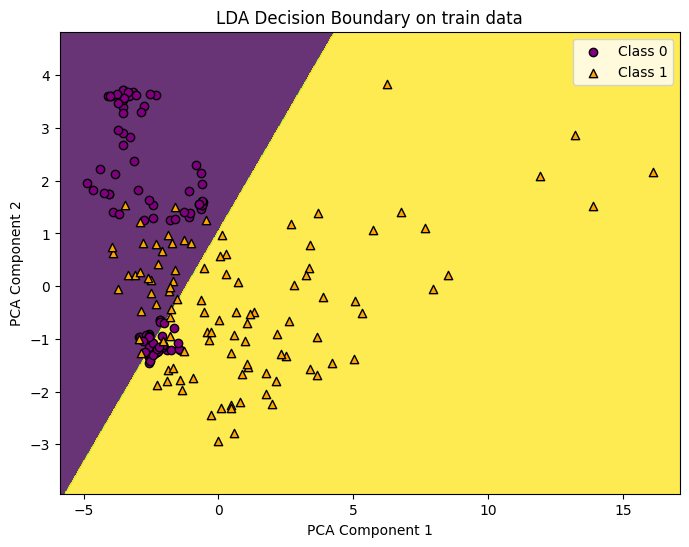

In [130]:
# Assuming clf_lda is already trained

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_train_balanced[:, 0].min() - 1, X_train_balanced[:, 0].max() + 1
y_min, y_max = X_train_balanced[:, 1].min() - 1, X_train_balanced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = clf_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Get the unique colors used in the scatter points
scatter_colors = ['purple', 'orange']

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, extend='both')

# Scatter plot for Class 0
plt.scatter(X_train_balanced[y_train_balanced == 0, 0], X_train_balanced[y_train_balanced == 0, 1], c='purple', edgecolors='k', label='Class 0', marker='o')

# Scatter plot for Class 1
plt.scatter(X_train_balanced[y_train_balanced == 1, 0], X_train_balanced[y_train_balanced == 1, 1], c='orange', edgecolors='k', label='Class 1', marker='^')

plt.title('LDA Decision Boundary on train data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()  # Add legend
plt.show()

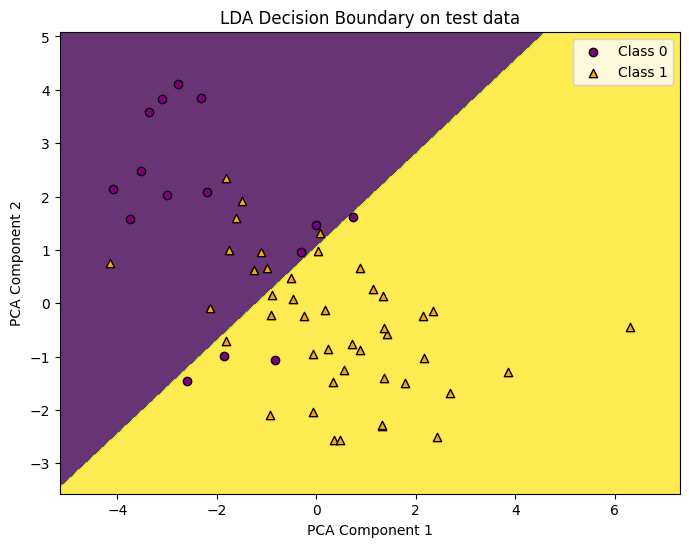

In [131]:
# Assuming clf_lda is already trained

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = clf_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Get the unique colors used in the scatter points
scatter_colors = ['purple', 'orange']

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, extend='both')

# Scatter plot for Class 0
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], c='purple', edgecolors='k', label='Class 0', marker='o')

# Scatter plot for Class 1
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], c='orange', edgecolors='k', label='Class 1', marker='^')

plt.title('LDA Decision Boundary on test data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()  # Add legend
plt.show()


 • Training Accuracy Score :  70.39
 • Cross Validation Score : 70.43
 ❖ Testing Accuracy Score :  76.27
 • Precision Score is : 89.47
 • Recall Score is : 77.27
 • F1-Score Score is : 82.93
--------------------------------------------------------------------------------


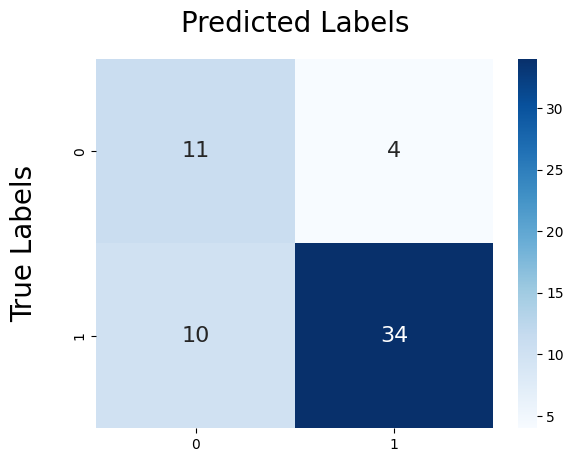

--------------------------------------------------------------------------------


In [132]:
Evaluate_Performance(LinearDiscriminantAnalysis() , X_train_balanced, X_test_pca, y_train_balanced, y_test)

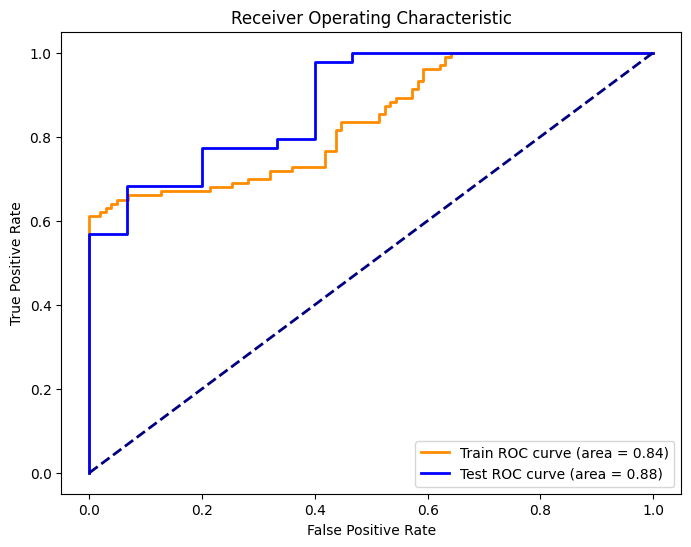

In [133]:
Evaluate_Performance_AUC(clf_lda, X_train_balanced, X_test_pca, y_train_balanced, y_test)

##Quadratic Discriminant Analysis

### Unbalanced Data

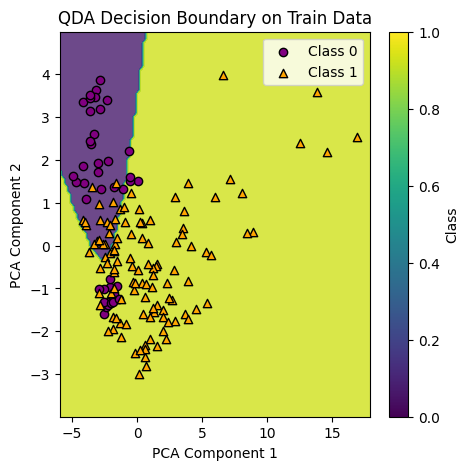

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA for 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 4: Fit Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train_pca, y_train)

# Step 5: Plot the Results
plt.figure(figsize=(5, 5))

# Plot decision regions
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Scatter plot of training data
# Scatter plot for Class 0
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], c='purple', edgecolors='k', label='Class 0', marker='o')

# Scatter plot for Class 1
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], c='orange', edgecolors='k', label='Class 1', marker='^')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('QDA Decision Boundary on Train Data')
plt.colorbar(label='Class')
plt.legend()
plt.show()


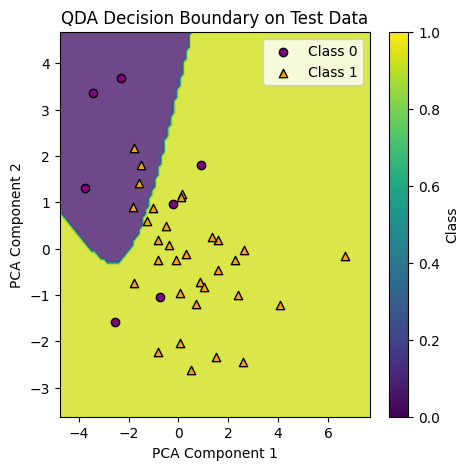

In [135]:
# Step 5: Plot the Results
plt.figure(figsize=(5,5))

# Plot decision regions
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Scatter plot of training data
# Scatter plot for Class 0
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], c='purple', edgecolors='k', label='Class 0', marker='o')

# Scatter plot for Class 1
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], c='orange', edgecolors='k', label='Class 1', marker='^')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('QDA Decision Boundary on Test Data')
plt.colorbar(label='Class')
plt.legend()
plt.show()


In [136]:
qda.priors_

array([0.26282051, 0.73717949])

In [137]:
qda.means_

array([[-2.60836564,  1.11338809],
       [ 0.92993906, -0.39694706]])

In [138]:
qda.covariance_

[array([[ 1.33815155, -0.74422931],
        [-0.74422931,  3.3789275 ]]),
 array([[14.603001  ,  1.67797307],
        [ 1.67797307,  1.715778  ]])]


 • Training Accuracy Score :  76.92
 • Cross Validation Score : 76.25
 ❖ Testing Accuracy Score :  79.49
 • Precision Score is : 87.5
 • Recall Score is : 87.5
 • F1-Score Score is : 87.5
--------------------------------------------------------------------------------


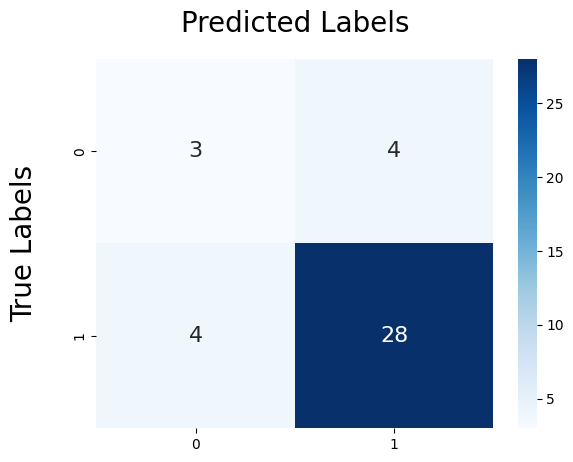

--------------------------------------------------------------------------------


In [139]:
Evaluate_Performance(QuadraticDiscriminantAnalysis() , X_train_pca, X_test_pca, y_train, y_test)

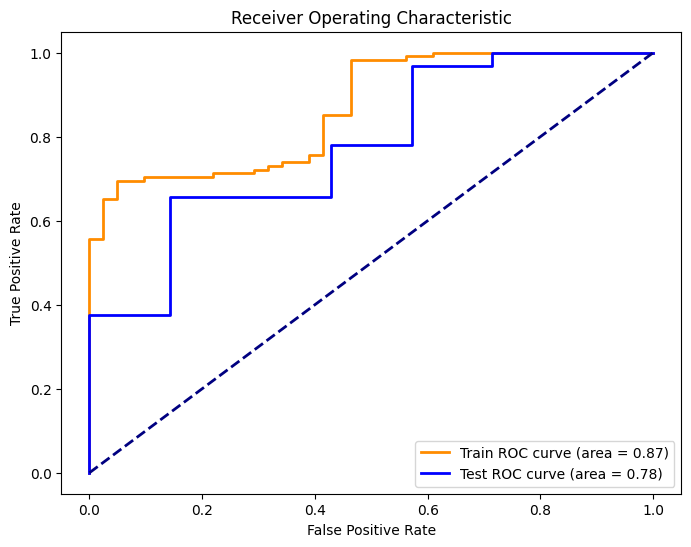

In [140]:
Evaluate_Performance_AUC(qda , X_train_pca, X_test_pca, y_train, y_test)

## Balanced Data

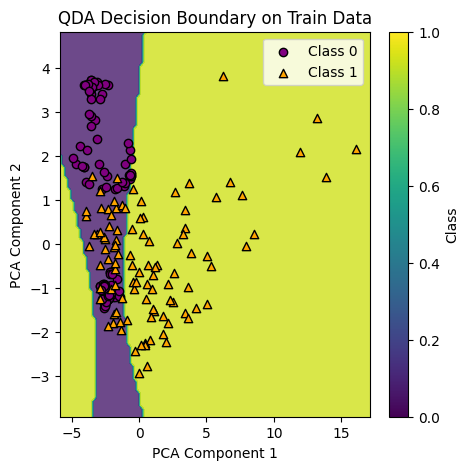

In [141]:

# Step 4: Fit Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train_balanced, y_train_balanced)

# Step 5: Plot the Results
plt.figure(figsize=(5, 5))

# Plot decision regions
x_min, x_max = X_train_balanced[:, 0].min() - 1, X_train_balanced[:, 0].max() + 1
y_min, y_max = X_train_balanced[:, 1].min() - 1, X_train_balanced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Scatter plot of training data
# Scatter plot for Class 0
plt.scatter(X_train_balanced[y_train_balanced == 0, 0], X_train_balanced[y_train_balanced == 0, 1], c='purple', edgecolors='k', label='Class 0', marker='o')

# Scatter plot for Class 1
plt.scatter(X_train_balanced[y_train_balanced == 1, 0], X_train_balanced[y_train_balanced == 1, 1], c='orange', edgecolors='k', label='Class 1', marker='^')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('QDA Decision Boundary on Train Data')
plt.colorbar(label='Class')
plt.legend()
plt.show()


In [142]:
qda.means_

array([[-2.56856691,  0.92474377],
       [ 0.84296212, -0.3315328 ]])

In [143]:
qda.covariance_

[array([[ 1.02851651, -0.7610744 ],
        [-0.7610744 ,  3.80023666]]),
 array([[14.72308614,  1.41540737],
        [ 1.41540737,  1.61266789]])]

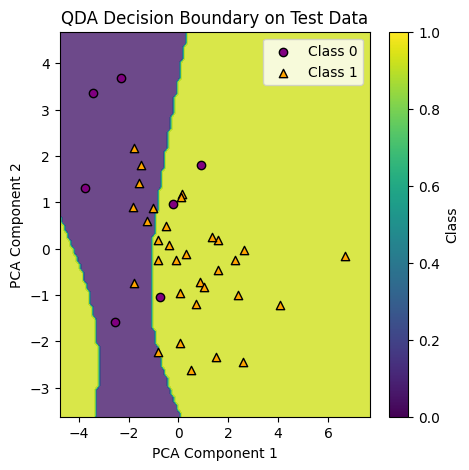

In [144]:
# Step 5: Plot the Results
plt.figure(figsize=(5,5))

# Plot decision regions
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Scatter plot of training data
# Scatter plot for Class 0
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], c='purple', edgecolors='k', label='Class 0', marker='o')

# Scatter plot for Class 1
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], c='orange', edgecolors='k', label='Class 1', marker='^')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('QDA Decision Boundary on Test Data')
plt.colorbar(label='Class')
plt.legend()
plt.show()



 • Training Accuracy Score :  78.16
 • Cross Validation Score : 78.64
 ❖ Testing Accuracy Score :  71.79
 • Precision Score is : 88.89
 • Recall Score is : 75.0
 • F1-Score Score is : 81.36
--------------------------------------------------------------------------------


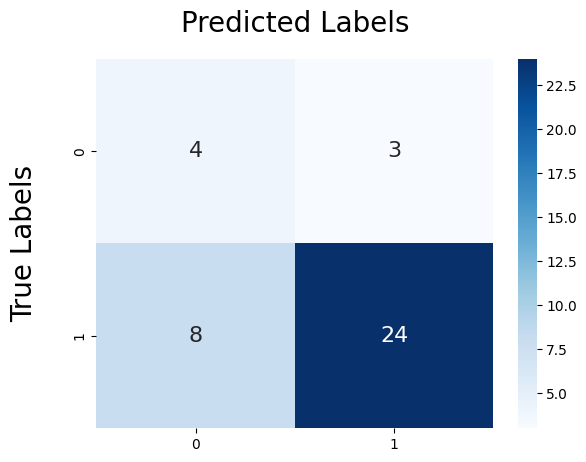

--------------------------------------------------------------------------------


In [145]:
Evaluate_Performance(QuadraticDiscriminantAnalysis() , X_train_balanced, X_test_pca, y_train_balanced, y_test)

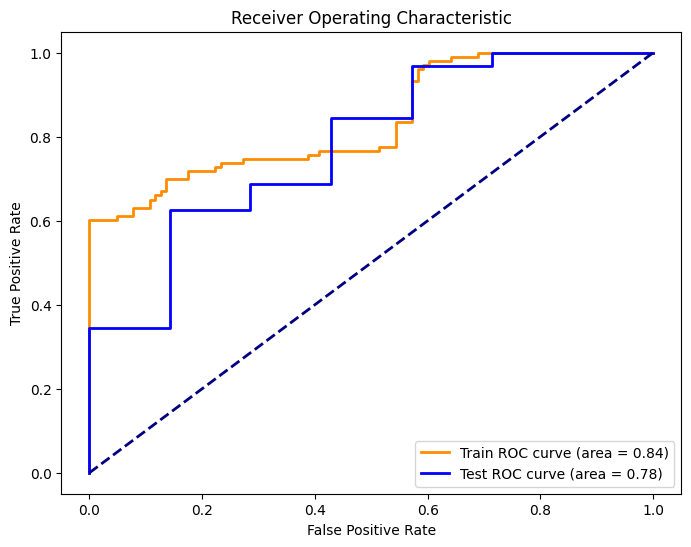

In [146]:
Evaluate_Performance_AUC(qda , X_train_balanced, X_test_pca, y_train_balanced, y_test)

## Analytical Comparison

### Balanced

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import numpy as np

# Define your models
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Initialize an array to store test errors for each model
test_errors = {model_name: [] for model_name in models.keys()}

# Assuming you have X and y available

# Generate 100 training datasets
for i in range(100):
    # Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Balance the training data using SMOTE
    smote = SMOTE(random_state=None)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    # Fit each model
    for model_name, model in models.items():
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_errors[model_name].append(test_error)

# Now test_errors dictionary contains the test error rates for each model on 100 different training sets


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: Us

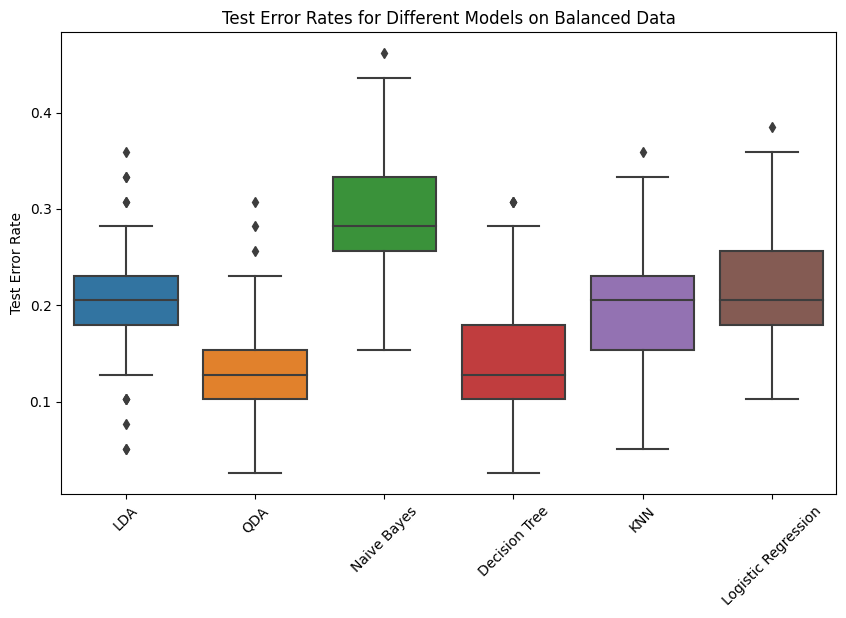

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the test errors dictionary to a DataFrame for easy plotting
import pandas as pd
test_errors_df = pd.DataFrame(test_errors)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_errors_df)
plt.title('Test Error Rates for Different Models on Balanced Data')
plt.ylabel('Test Error Rate')
plt.xticks(rotation=45)
plt.show()


## Unbalanced

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'df' containing your entire dataset


# Define the features (X) and target (y)
X = parkinsons_data.drop(columns=['status',"name"])  # Assuming 'target' is the column name for the response variable
y = parkinsons_data['status']

# Generate the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)  # Set an appropriate random_state

# Initialize the models
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion="gini",max_depth=8, min_samples_leaf=3 , min_samples_split=4),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}


# Initialize a list to store test error rates
test_error_rates = []

# Simulate the process for 100 random training sets
for _ in range(100):
    # Generate a random training set
    X_train_random, _, y_train_random, _ = train_test_split(X, y, test_size=0.8, random_state=None)  # Set an appropriate random_state

    # Scale the data
    scaler = StandardScaler()
    X_train_random = scaler.fit_transform(X_train_random)
    X_test_scaled = scaler.transform(X_test)

    # For each model, fit on training data and compute test error on the fixed test set
    for model_name, model in models.items():
        model.fit(X_train_random, y_train_random)
        y_pred = model.predict(X_test_scaled)
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_error_rates.append({'Model': model_name, 'Test Error': test_error})

# Now, 'test_error_rates' contains the test error rates for each model on 100 random training sets with a fixed test set after scaling


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: Us

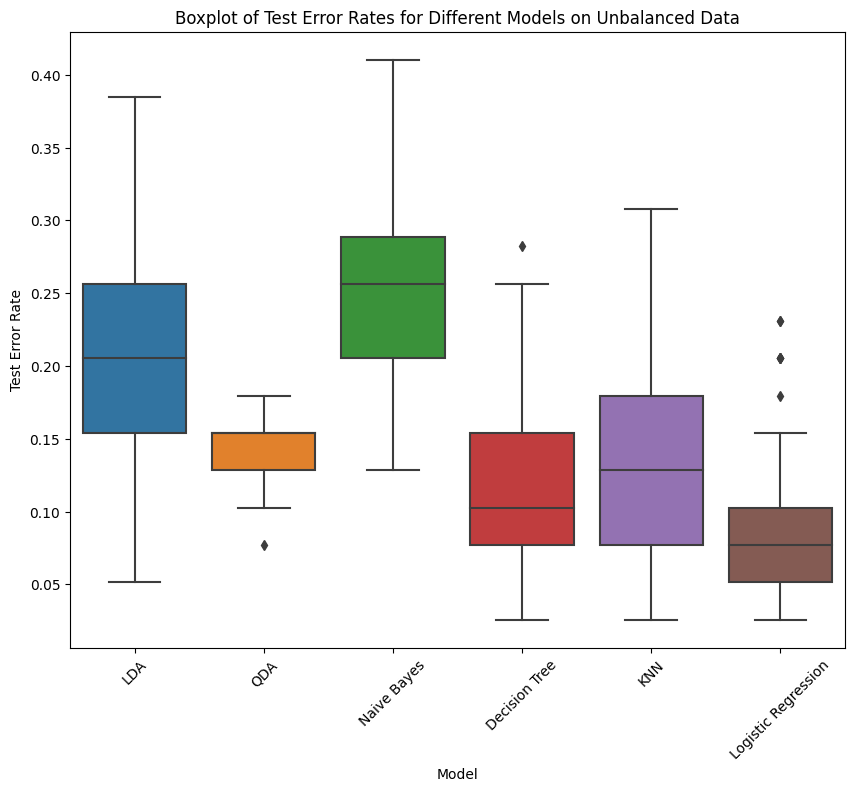

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'test_error_rates' is a list of dictionaries containing model names and test error rates

# Convert the list of dictionaries to a pandas DataFrame
df_test_error_rates = pd.DataFrame(test_error_rates)

# Plot boxplots
plt.figure(figsize=(10, 8))
sns.boxplot(x='Model', y='Test Error', data=df_test_error_rates)
plt.title('Boxplot of Test Error Rates for Different Models on Unbalanced Data')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('Test Error Rate')
plt.show()
